In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from handler import build_dataset
from models import cnn_model, lstm_model, lstm_cnn_model, run_model
from tuning import create_study, get_optimized_parameters

2023-12-04 18:38:25.324127: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/miniconda3/envs/fintech/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 0. Load Data Set

In [2]:
train_df, val_df, test_df = build_dataset(path='./src/rv_sentiment.csv')

Prediction lookback (n_steps): 72
Prediction horizon (n_horizon): 24
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))


# 1. Hyperparameter Tuning

In [3]:
cnn_study = create_study(model_fun=cnn_model,
                         train=train_df,
                         val=val_df)
lstm_study = create_study(model_fun=lstm_model,
                          train=train_df,
                          val=val_df)
stacked_study = create_study(model_fun=lstm_cnn_model,
                             train=train_df,
                             val=val_df)

/opt/miniconda3/envs/fintech/lib/python3.10/site-packages/optuna/samplers/_tpe/sampler.py:295: ExperimentalWarning: ``multivariate`` option is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2023-12-04 18:42:40,236] A new study created in RDB with name: no-name-09d75dc2-5941-48b0-a3f0-654f098b84fa


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0439 - mae: 0.2295 - val_loss: 0.5052 - val_mae: 0.8823
Epoch 2/150
1/1 [==============================] - 0s 54ms/step - loss: 0.5836 - mae: 0.9529 - val_loss: 0.3337 - val_mae: 0.7179
Epoch 3/150
1/1 [==============================] - 0s 71ms/step - loss: 0.2958 - mae: 0.6610 - val_loss: 0.0294 - val_mae: 0.1454
Epoch 4/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0146 - mae: 0.1367 - val_loss: 0.0223 - val_mae: 0.1140
Epoch 5/150
1/1 [==============================] - 0s 82ms/step - loss: 0.0089 - mae: 0.1008 - val_loss: 0.0199 - val_mae: 0.0867
Epoch 6/150
1/1 [==============================] - 0s 79ms/step - loss: 0.0062 - mae: 0.0770 - val_loss: 0.0165 - val_mae: 0.0931
Epoch 7/150
1/1 [==============================] - 0s 69ms/step - loss: 0.0049 - mae: 0.0728 - val_loss: 0.0167 - val_mae: 0.0917
Epoch 8/150
1/1 [==============================] - 0s 67ms/step - loss: 0.0045 - mae: 0.0715

[I 2023-12-04 18:42:51,500] Trial 0 finished with value: 0.08503767848014832 and parameters: {'learning_rate': 0.017352599516071498, 'weight_decay': 8.69895482936706e-05}. Best is trial 0 with value: 0.08503767848014832.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0500 - mae: 0.2528 - val_loss: 0.0320 - val_mae: 0.1594
Epoch 2/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0456 - mae: 0.2365 - val_loss: 0.0318 - val_mae: 0.1587
Epoch 3/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0551 - mae: 0.2597 - val_loss: 0.0316 - val_mae: 0.1579
Epoch 4/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0574 - mae: 0.2696 - val_loss: 0.0314 - val_mae: 0.1571
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0629 - mae: 0.2795 - val_loss: 0.0312 - val_mae: 0.1563
Epoch 6/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0567 - mae: 0.2698 - val_loss: 0.0310 - val_mae: 0.1554
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0458 - mae: 0.2476 - val_loss: 0.0308 - val_mae: 0.1546
Epoch 8/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0475 - mae: 0.2466

[I 2023-12-04 18:43:02,718] Trial 1 finished with value: 0.09461578726768494 and parameters: {'learning_rate': 7.173612948658869e-06, 'weight_decay': 0.0001298913434059281}. Best is trial 0 with value: 0.08503767848014832.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0935 - mae: 0.3552 - val_loss: 0.0544 - val_mae: 0.2537
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0792 - mae: 0.3169 - val_loss: 0.0500 - val_mae: 0.2403
Epoch 3/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0748 - mae: 0.3143 - val_loss: 0.0459 - val_mae: 0.2268
Epoch 4/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0768 - mae: 0.3101 - val_loss: 0.0422 - val_mae: 0.2144
Epoch 5/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0657 - mae: 0.2847 - val_loss: 0.0388 - val_mae: 0.2029
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0630 - mae: 0.2756 - val_loss: 0.0357 - val_mae: 0.1919
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0559 - mae: 0.2635 - val_loss: 0.0331 - val_mae: 0.1812
Epoch 8/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0553 - mae: 0.2614

[I 2023-12-04 18:43:13,940] Trial 2 finished with value: 0.09827699512243271 and parameters: {'learning_rate': 8.184076241648664e-05, 'weight_decay': 4.822966418376956e-06}. Best is trial 0 with value: 0.08503767848014832.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0534 - mae: 0.2611 - val_loss: 0.0410 - val_mae: 0.2294
Epoch 2/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0456 - mae: 0.2423 - val_loss: 0.0172 - val_mae: 0.1052
Epoch 3/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0097 - mae: 0.1090 - val_loss: 0.0186 - val_mae: 0.0890
Epoch 4/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0066 - mae: 0.0835 - val_loss: 0.0194 - val_mae: 0.0874
Epoch 5/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0060 - mae: 0.0783 - val_loss: 0.0192 - val_mae: 0.0845
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0055 - mae: 0.0761 - val_loss: 0.0188 - val_mae: 0.0842
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0052 - mae: 0.0724 - val_loss: 0.0182 - val_mae: 0.0860
Epoch 8/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0047 - mae: 0.0694

[I 2023-12-04 18:43:25,280] Trial 3 finished with value: 0.08510519564151764 and parameters: {'learning_rate': 0.003630024147729035, 'weight_decay': 0.000312443332199213}. Best is trial 0 with value: 0.08503767848014832.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0547 - mae: 0.2608 - val_loss: 0.0310 - val_mae: 0.1710
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0379 - mae: 0.2123 - val_loss: 0.0272 - val_mae: 0.1556
Epoch 3/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0478 - mae: 0.2415 - val_loss: 0.0244 - val_mae: 0.1419
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0333 - mae: 0.2098 - val_loss: 0.0225 - val_mae: 0.1315
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0323 - mae: 0.1944 - val_loss: 0.0212 - val_mae: 0.1242
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0286 - mae: 0.1853 - val_loss: 0.0206 - val_mae: 0.1196
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0254 - mae: 0.1759 - val_loss: 0.0204 - val_mae: 0.1165
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0223 - mae: 0.1623

[I 2023-12-04 18:43:37,179] Trial 4 finished with value: 0.09693402051925659 and parameters: {'learning_rate': 0.00017596799005821075, 'weight_decay': 7.223387288213484e-06}. Best is trial 0 with value: 0.08503767848014832.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0963 - mae: 0.3558 - val_loss: 0.0520 - val_mae: 0.2416
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0843 - mae: 0.3243 - val_loss: 0.0512 - val_mae: 0.2394
Epoch 3/150
1/1 [==============================] - 0s 55ms/step - loss: 0.0879 - mae: 0.3303 - val_loss: 0.0504 - val_mae: 0.2371
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0827 - mae: 0.3227 - val_loss: 0.0496 - val_mae: 0.2348
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0941 - mae: 0.3552 - val_loss: 0.0488 - val_mae: 0.2324
Epoch 6/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0847 - mae: 0.3231 - val_loss: 0.0480 - val_mae: 0.2301
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0762 - mae: 0.2953 - val_loss: 0.0472 - val_mae: 0.2278
Epoch 8/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0727 - mae: 0.3036

[I 2023-12-04 18:43:48,311] Trial 5 finished with value: 0.10726500302553177 and parameters: {'learning_rate': 1.4198047141564276e-05, 'weight_decay': 5.9621886024668284e-05}. Best is trial 0 with value: 0.08503767848014832.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0779 - mae: 0.3096 - val_loss: 0.0482 - val_mae: 0.2300
Epoch 2/150
1/1 [==============================] - 0s 54ms/step - loss: 0.0649 - mae: 0.2962 - val_loss: 0.0480 - val_mae: 0.2291
Epoch 3/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0649 - mae: 0.2913 - val_loss: 0.0477 - val_mae: 0.2282
Epoch 4/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0731 - mae: 0.3073 - val_loss: 0.0474 - val_mae: 0.2273
Epoch 5/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0711 - mae: 0.3013 - val_loss: 0.0471 - val_mae: 0.2263
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0696 - mae: 0.2870 - val_loss: 0.0469 - val_mae: 0.2254
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0759 - mae: 0.3015 - val_loss: 0.0466 - val_mae: 0.2245
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0657 - mae: 0.2853

[I 2023-12-04 18:43:59,681] Trial 6 finished with value: 0.13425305485725403 and parameters: {'learning_rate': 5.1964494607677525e-06, 'weight_decay': 1.0486107471664106e-06}. Best is trial 0 with value: 0.08503767848014832.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.1062 - mae: 0.3705 - val_loss: 1.5243 - val_mae: 1.9996
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 1.8264 - mae: 2.2930 - val_loss: 0.0635 - val_mae: 0.2880
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0838 - mae: 0.3260 - val_loss: 0.0300 - val_mae: 0.1425
Epoch 4/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0191 - mae: 0.1566 - val_loss: 0.0252 - val_mae: 0.1184
Epoch 5/150
1/1 [==============================] - 0s 46ms/step - loss: 0.0115 - mae: 0.1190 - val_loss: 0.0211 - val_mae: 0.0966
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0068 - mae: 0.0918 - val_loss: 0.0205 - val_mae: 0.0931
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0056 - mae: 0.0770 - val_loss: 0.0219 - val_mae: 0.0993
Epoch 8/150
1/1 [==============================] - 0s 55ms/step - loss: 0.0060 - mae: 0.0794

[I 2023-12-04 18:44:10,611] Trial 7 finished with value: 0.08398724347352982 and parameters: {'learning_rate': 0.014184182629741164, 'weight_decay': 0.005230149332101854}. Best is trial 7 with value: 0.08398724347352982.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.1280 - mae: 0.4122 - val_loss: 0.0680 - val_mae: 0.2694
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.1083 - mae: 0.3602 - val_loss: 0.0672 - val_mae: 0.2674
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.1044 - mae: 0.3699 - val_loss: 0.0664 - val_mae: 0.2653
Epoch 4/150
1/1 [==============================] - 0s 51ms/step - loss: 0.1272 - mae: 0.4184 - val_loss: 0.0656 - val_mae: 0.2632
Epoch 5/150
1/1 [==============================] - 0s 52ms/step - loss: 0.1139 - mae: 0.3810 - val_loss: 0.0648 - val_mae: 0.2610
Epoch 6/150
1/1 [==============================] - 0s 54ms/step - loss: 0.1068 - mae: 0.3695 - val_loss: 0.0640 - val_mae: 0.2589
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.1002 - mae: 0.3545 - val_loss: 0.0632 - val_mae: 0.2567
Epoch 8/150
1/1 [==============================] - 0s 50ms/step - loss: 0.1106 - mae: 0.3768

[I 2023-12-04 18:44:21,584] Trial 8 finished with value: 0.11417494714260101 and parameters: {'learning_rate': 9.723330078432912e-06, 'weight_decay': 0.006508443549129702}. Best is trial 7 with value: 0.08398724347352982.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0577 - mae: 0.2716 - val_loss: 0.9041 - val_mae: 1.3223
Epoch 2/150
1/1 [==============================] - 0s 54ms/step - loss: 1.0780 - mae: 1.5172 - val_loss: 0.3775 - val_mae: 0.7531
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.4531 - mae: 0.8440 - val_loss: 0.0386 - val_mae: 0.1921
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0256 - mae: 0.1799 - val_loss: 1.2638 - val_mae: 1.7166
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 1.5144 - mae: 1.9834 - val_loss: 0.1351 - val_mae: 0.4643
Epoch 6/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0939 - mae: 0.3779 - val_loss: 0.1173 - val_mae: 0.4360
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.1504 - mae: 0.4936 - val_loss: 0.0260 - val_mae: 0.1139
Epoch 8/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0093 - mae: 0.1060

[I 2023-12-04 18:44:32,995] Trial 9 finished with value: 0.08421843498945236 and parameters: {'learning_rate': 0.023987288201424622, 'weight_decay': 8.744533594516013e-09}. Best is trial 7 with value: 0.08398724347352982.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.1150 - mae: 0.3878 - val_loss: 0.1797 - val_mae: 0.4984
Epoch 2/150
1/1 [==============================] - 0s 52ms/step - loss: 0.2460 - mae: 0.5834 - val_loss: 0.0543 - val_mae: 0.2495
Epoch 3/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0716 - mae: 0.2905 - val_loss: 0.0282 - val_mae: 0.1518
Epoch 4/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0209 - mae: 0.1603 - val_loss: 0.0235 - val_mae: 0.1187
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0107 - mae: 0.1123 - val_loss: 0.0226 - val_mae: 0.1073
Epoch 6/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0095 - mae: 0.1017 - val_loss: 0.0223 - val_mae: 0.1040
Epoch 7/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0076 - mae: 0.0907 - val_loss: 0.0222 - val_mae: 0.1032
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0077 - mae: 0.0897

[I 2023-12-04 18:44:43,908] Trial 10 finished with value: 0.08719658851623535 and parameters: {'learning_rate': 0.0031618314586241364, 'weight_decay': 0.004302204021535236}. Best is trial 7 with value: 0.08398724347352982.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0557 - mae: 0.2719 - val_loss: 2.4155 - val_mae: 2.9046
Epoch 2/150
1/1 [==============================] - 0s 53ms/step - loss: 2.5804 - mae: 3.0568 - val_loss: 0.1307 - val_mae: 0.4471
Epoch 3/150
1/1 [==============================] - 0s 49ms/step - loss: 0.1478 - mae: 0.4526 - val_loss: 0.0511 - val_mae: 0.2507
Epoch 4/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0636 - mae: 0.2854 - val_loss: 0.0323 - val_mae: 0.1698
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0184 - mae: 0.1540 - val_loss: 0.0270 - val_mae: 0.1373
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0090 - mae: 0.1015 - val_loss: 0.0238 - val_mae: 0.1103
Epoch 7/150
1/1 [==============================] - 0s 55ms/step - loss: 0.0085 - mae: 0.0992 - val_loss: 0.0228 - val_mae: 0.1041
Epoch 8/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0074 - mae: 0.0888

[I 2023-12-04 18:44:54,915] Trial 11 finished with value: 0.09484092891216278 and parameters: {'learning_rate': 0.020044232494369173, 'weight_decay': 7.740953401860817e-09}. Best is trial 7 with value: 0.08398724347352982.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0445 - mae: 0.2293 - val_loss: 1.9428 - val_mae: 2.3706
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 2.2644 - mae: 2.7229 - val_loss: 0.3995 - val_mae: 0.8313
Epoch 3/150
1/1 [==============================] - 0s 52ms/step - loss: 0.5026 - mae: 0.9245 - val_loss: 0.0725 - val_mae: 0.2917
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.1012 - mae: 0.3625 - val_loss: 0.0332 - val_mae: 0.1811
Epoch 5/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0305 - mae: 0.1900 - val_loss: 0.0241 - val_mae: 0.1184
Epoch 6/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0159 - mae: 0.1334 - val_loss: 0.0222 - val_mae: 0.1045
Epoch 7/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0079 - mae: 0.0937 - val_loss: 0.0193 - val_mae: 0.0887
Epoch 8/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0063 - mae: 0.0856

[I 2023-12-04 18:45:06,648] Trial 12 finished with value: 0.09233224391937256 and parameters: {'learning_rate': 0.02287608448294248, 'weight_decay': 0.005543414928351051}. Best is trial 7 with value: 0.08398724347352982.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0572 - mae: 0.2693 - val_loss: 0.0904 - val_mae: 0.3380
Epoch 2/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0917 - mae: 0.3289 - val_loss: 0.0193 - val_mae: 0.1032
Epoch 3/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0083 - mae: 0.0961 - val_loss: 0.0229 - val_mae: 0.1056
Epoch 4/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0075 - mae: 0.0899 - val_loss: 0.0231 - val_mae: 0.1065
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0078 - mae: 0.0912 - val_loss: 0.0223 - val_mae: 0.1012
Epoch 6/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0072 - mae: 0.0827 - val_loss: 0.0213 - val_mae: 0.0941
Epoch 7/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0065 - mae: 0.0798 - val_loss: 0.0203 - val_mae: 0.0892
Epoch 8/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0056 - mae: 0.0756

[I 2023-12-04 18:45:17,676] Trial 13 finished with value: 0.08677712082862854 and parameters: {'learning_rate': 0.004268080954194253, 'weight_decay': 2.9168736693655427e-08}. Best is trial 7 with value: 0.08398724347352982.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0567 - mae: 0.2696 - val_loss: 0.1955 - val_mae: 0.5337
Epoch 2/150
1/1 [==============================] - 0s 47ms/step - loss: 0.2288 - mae: 0.5750 - val_loss: 0.0328 - val_mae: 0.1664
Epoch 3/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0227 - mae: 0.1695 - val_loss: 0.0274 - val_mae: 0.1473
Epoch 4/150
1/1 [==============================] - 0s 53ms/step - loss: 0.0159 - mae: 0.1398 - val_loss: 0.0231 - val_mae: 0.1166
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0086 - mae: 0.0992 - val_loss: 0.0232 - val_mae: 0.1090
Epoch 6/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0081 - mae: 0.0937 - val_loss: 0.0213 - val_mae: 0.0948
Epoch 7/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0064 - mae: 0.0790 - val_loss: 0.0191 - val_mae: 0.0938
Epoch 8/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0067 - mae: 0.0848

[I 2023-12-04 18:45:28,806] Trial 14 finished with value: 0.08045151829719543 and parameters: {'learning_rate': 0.006547253161581226, 'weight_decay': 7.622534278615785e-07}. Best is trial 14 with value: 0.08045151829719543.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.1125 - mae: 0.3892 - val_loss: 1.4176 - val_mae: 1.8714
Epoch 2/150
1/1 [==============================] - 0s 52ms/step - loss: 1.7655 - mae: 2.2012 - val_loss: 0.1602 - val_mae: 0.4591
Epoch 3/150
1/1 [==============================] - 0s 54ms/step - loss: 0.1732 - mae: 0.4910 - val_loss: 0.0674 - val_mae: 0.2943
Epoch 4/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0663 - mae: 0.2961 - val_loss: 0.0703 - val_mae: 0.2943
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0797 - mae: 0.3258 - val_loss: 0.0726 - val_mae: 0.3541
Epoch 6/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0627 - mae: 0.3180 - val_loss: 0.0318 - val_mae: 0.1874
Epoch 7/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0277 - mae: 0.1868 - val_loss: 0.0301 - val_mae: 0.1790
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0313 - mae: 0.1915

[I 2023-12-04 18:45:39,843] Trial 15 finished with value: 0.084881991147995 and parameters: {'learning_rate': 0.025777226607309283, 'weight_decay': 1.597843996967042e-06}. Best is trial 14 with value: 0.08045151829719543.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0796 - mae: 0.3166 - val_loss: 0.0240 - val_mae: 0.1482
Epoch 2/150
1/1 [==============================] - 0s 53ms/step - loss: 0.0380 - mae: 0.2174 - val_loss: 0.0258 - val_mae: 0.1619
Epoch 3/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0343 - mae: 0.2099 - val_loss: 0.0258 - val_mae: 0.1606
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0308 - mae: 0.2005 - val_loss: 0.0220 - val_mae: 0.1367
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0214 - mae: 0.1662 - val_loss: 0.0192 - val_mae: 0.1119
Epoch 6/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0154 - mae: 0.1437 - val_loss: 0.0184 - val_mae: 0.1002
Epoch 7/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0114 - mae: 0.1180 - val_loss: 0.0186 - val_mae: 0.0964
Epoch 8/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0105 - mae: 0.1118

[I 2023-12-04 18:45:50,890] Trial 16 finished with value: 0.08356054872274399 and parameters: {'learning_rate': 0.0011066168053900564, 'weight_decay': 1.4116108524414525e-06}. Best is trial 14 with value: 0.08045151829719543.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0873 - mae: 0.3384 - val_loss: 0.0605 - val_mae: 0.2777
Epoch 2/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0812 - mae: 0.3327 - val_loss: 0.0305 - val_mae: 0.1893
Epoch 3/150
1/1 [==============================] - 0s 55ms/step - loss: 0.0412 - mae: 0.2314 - val_loss: 0.0187 - val_mae: 0.1160
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0161 - mae: 0.1376 - val_loss: 0.0196 - val_mae: 0.1077
Epoch 5/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0132 - mae: 0.1272 - val_loss: 0.0215 - val_mae: 0.1175
Epoch 6/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0117 - mae: 0.1197 - val_loss: 0.0223 - val_mae: 0.1172
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0113 - mae: 0.1135 - val_loss: 0.0222 - val_mae: 0.1133
Epoch 8/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0093 - mae: 0.1063

[I 2023-12-04 18:46:02,071] Trial 17 finished with value: 0.08329557627439499 and parameters: {'learning_rate': 0.0019742146903142703, 'weight_decay': 8.307434620137046e-07}. Best is trial 14 with value: 0.08045151829719543.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.1289 - mae: 0.4142 - val_loss: 0.0462 - val_mae: 0.2258
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0709 - mae: 0.2967 - val_loss: 0.0323 - val_mae: 0.1684
Epoch 3/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0557 - mae: 0.2676 - val_loss: 0.0254 - val_mae: 0.1329
Epoch 4/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0457 - mae: 0.2420 - val_loss: 0.0225 - val_mae: 0.1156
Epoch 5/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0364 - mae: 0.2120 - val_loss: 0.0207 - val_mae: 0.1135
Epoch 6/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0343 - mae: 0.2118 - val_loss: 0.0199 - val_mae: 0.1107
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0297 - mae: 0.1931 - val_loss: 0.0191 - val_mae: 0.1081
Epoch 8/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0283 - mae: 0.1874

[I 2023-12-04 18:46:12,933] Trial 18 finished with value: 0.09377338737249374 and parameters: {'learning_rate': 0.0004362029281454469, 'weight_decay': 3.297981168995382e-08}. Best is trial 14 with value: 0.08045151829719543.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0672 - mae: 0.2985 - val_loss: 0.0834 - val_mae: 0.3432
Epoch 2/150
1/1 [==============================] - 0s 49ms/step - loss: 0.1108 - mae: 0.3908 - val_loss: 0.0344 - val_mae: 0.1836
Epoch 3/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0312 - mae: 0.1955 - val_loss: 0.0236 - val_mae: 0.1250
Epoch 4/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0124 - mae: 0.1241 - val_loss: 0.0235 - val_mae: 0.1080
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0098 - mae: 0.1065 - val_loss: 0.0236 - val_mae: 0.1067
Epoch 6/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0087 - mae: 0.0998 - val_loss: 0.0231 - val_mae: 0.1050
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0083 - mae: 0.0967 - val_loss: 0.0220 - val_mae: 0.1013
Epoch 8/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0074 - mae: 0.0881

[I 2023-12-04 18:46:23,893] Trial 19 finished with value: 0.08468662202358246 and parameters: {'learning_rate': 0.0027804327827490043, 'weight_decay': 4.517394395575848e-06}. Best is trial 14 with value: 0.08045151829719543.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0619 - mae: 0.2805 - val_loss: 0.0329 - val_mae: 0.1782
Epoch 2/150
1/1 [==============================] - 0s 54ms/step - loss: 0.0452 - mae: 0.2402 - val_loss: 0.0284 - val_mae: 0.1605
Epoch 3/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0355 - mae: 0.2131 - val_loss: 0.0249 - val_mae: 0.1454
Epoch 4/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0324 - mae: 0.2046 - val_loss: 0.0222 - val_mae: 0.1335
Epoch 5/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0340 - mae: 0.2109 - val_loss: 0.0201 - val_mae: 0.1228
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0273 - mae: 0.1879 - val_loss: 0.0186 - val_mae: 0.1141
Epoch 7/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0250 - mae: 0.1755 - val_loss: 0.0175 - val_mae: 0.1070
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0222 - mae: 0.1663

[I 2023-12-04 18:46:35,213] Trial 20 finished with value: 0.09668686985969543 and parameters: {'learning_rate': 0.0001683163977248562, 'weight_decay': 2.048318699209433e-09}. Best is trial 14 with value: 0.08045151829719543.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0451 - mae: 0.2471 - val_loss: 0.0224 - val_mae: 0.1401
Epoch 2/150
1/1 [==============================] - 0s 53ms/step - loss: 0.0272 - mae: 0.1847 - val_loss: 0.0218 - val_mae: 0.1265
Epoch 3/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0218 - mae: 0.1678 - val_loss: 0.0203 - val_mae: 0.1145
Epoch 4/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0153 - mae: 0.1380 - val_loss: 0.0203 - val_mae: 0.1135
Epoch 5/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0101 - mae: 0.1105 - val_loss: 0.0205 - val_mae: 0.1147
Epoch 6/150
1/1 [==============================] - 0s 55ms/step - loss: 0.0085 - mae: 0.1054 - val_loss: 0.0203 - val_mae: 0.1122
Epoch 7/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0083 - mae: 0.1046 - val_loss: 0.0201 - val_mae: 0.1090
Epoch 8/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0073 - mae: 0.0926

[I 2023-12-04 18:46:46,363] Trial 21 finished with value: 0.10334796458482742 and parameters: {'learning_rate': 0.0011424595761808235, 'weight_decay': 3.2719522473580964e-07}. Best is trial 14 with value: 0.08045151829719543.


Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 0.1391 - mae: 0.4121 - val_loss: 0.3061 - val_mae: 0.6788
Epoch 2/150
1/1 [==============================] - 0s 51ms/step - loss: 0.3887 - mae: 0.7678 - val_loss: 0.0311 - val_mae: 0.1889
Epoch 3/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0240 - mae: 0.1734 - val_loss: 0.0242 - val_mae: 0.1154
Epoch 4/150
1/1 [==============================] - 0s 51ms/step - loss: 0.0111 - mae: 0.1137 - val_loss: 0.0238 - val_mae: 0.1077
Epoch 5/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0084 - mae: 0.0968 - val_loss: 0.0230 - val_mae: 0.1051
Epoch 6/150
1/1 [==============================] - 0s 53ms/step - loss: 0.0077 - mae: 0.0916 - val_loss: 0.0217 - val_mae: 0.0969
Epoch 7/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0070 - mae: 0.0851 - val_loss: 0.0199 - val_mae: 0.0863
Epoch 8/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0060 - mae: 0.0773

[I 2023-12-04 18:46:58,250] Trial 22 finished with value: 0.08396507054567337 and parameters: {'learning_rate': 0.005754092520191024, 'weight_decay': 1.8448355981529016e-06}. Best is trial 14 with value: 0.08045151829719543.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0503 - mae: 0.2544 - val_loss: 0.0239 - val_mae: 0.1249
Epoch 2/150
1/1 [==============================] - 0s 53ms/step - loss: 0.0294 - mae: 0.1978 - val_loss: 0.0196 - val_mae: 0.1045
Epoch 3/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0227 - mae: 0.1691 - val_loss: 0.0187 - val_mae: 0.1093
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0221 - mae: 0.1707 - val_loss: 0.0193 - val_mae: 0.1163
Epoch 5/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0177 - mae: 0.1516 - val_loss: 0.0201 - val_mae: 0.1178
Epoch 6/150
1/1 [==============================] - 0s 52ms/step - loss: 0.0190 - mae: 0.1597 - val_loss: 0.0204 - val_mae: 0.1149
Epoch 7/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0139 - mae: 0.1328 - val_loss: 0.0204 - val_mae: 0.1101
Epoch 8/150
1/1 [==============================] - 0s 48ms/step - loss: 0.0136 - mae: 0.1279

[I 2023-12-04 18:47:09,400] Trial 23 finished with value: 0.08773404359817505 and parameters: {'learning_rate': 0.0005455532692229183, 'weight_decay': 6.283510497269223e-07}. Best is trial 14 with value: 0.08045151829719543.


Epoch 1/150
1/1 [==============================] - 1s 1s/step - loss: 0.0923 - mae: 0.3431 - val_loss: 0.0602 - val_mae: 0.2595
Epoch 2/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0992 - mae: 0.3477 - val_loss: 0.0601 - val_mae: 0.2593
Epoch 3/150
1/1 [==============================] - 0s 54ms/step - loss: 0.0906 - mae: 0.3360 - val_loss: 0.0600 - val_mae: 0.2590
Epoch 4/150
1/1 [==============================] - 0s 47ms/step - loss: 0.0730 - mae: 0.3011 - val_loss: 0.0599 - val_mae: 0.2587
Epoch 5/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0996 - mae: 0.3532 - val_loss: 0.0598 - val_mae: 0.2585
Epoch 6/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0928 - mae: 0.3332 - val_loss: 0.0597 - val_mae: 0.2582
Epoch 7/150
1/1 [==============================] - 0s 47ms/step - loss: 0.1045 - mae: 0.3556 - val_loss: 0.0596 - val_mae: 0.2579
Epoch 8/150
1/1 [==============================] - 0s 49ms/step - loss: 0.0888 - mae: 0.3302

[I 2023-12-04 18:47:20,450] Trial 24 finished with value: 0.22176793217658997 and parameters: {'learning_rate': 1.4277721913203198e-06, 'weight_decay': 7.468173516712232e-09}. Best is trial 14 with value: 0.08045151829719543.
[I 2023-12-04 18:47:20,495] A new study created in RDB with name: no-name-750299b0-0b4e-4bf8-b195-df9d3e9aaffd


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0100 - mae: 0.1103 - val_loss: 0.0240 - val_mae: 0.1185
Epoch 2/150
1/1 [==============================] - 0s 102ms/step - loss: 0.0097 - mae: 0.1070 - val_loss: 0.0240 - val_mae: 0.1185
Epoch 3/150
1/1 [==============================] - 0s 110ms/step - loss: 0.0101 - mae: 0.1075 - val_loss: 0.0240 - val_mae: 0.1184
Epoch 4/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0100 - mae: 0.1080 - val_loss: 0.0240 - val_mae: 0.1184
Epoch 5/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0098 - mae: 0.1054 - val_loss: 0.0240 - val_mae: 0.1184
Epoch 6/150
1/1 [==============================] - 0s 106ms/step - loss: 0.0100 - mae: 0.1073 - val_loss: 0.0240 - val_mae: 0.1184
Epoch 7/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0097 - mae: 0.1062 - val_loss: 0.0240 - val_mae: 0.1184
Epoch 8/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0099 - mae: 0.1

[I 2023-12-04 18:47:40,387] Trial 0 finished with value: 0.11750979721546173 and parameters: {'learning_rate': 1.1943576480019415e-06, 'weight_decay': 4.8151753602524324e-05}. Best is trial 0 with value: 0.11750979721546173.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0087 - mae: 0.1025 - val_loss: 0.0238 - val_mae: 0.1171
Epoch 2/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0087 - mae: 0.1016 - val_loss: 0.0238 - val_mae: 0.1171
Epoch 3/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0092 - mae: 0.1037 - val_loss: 0.0238 - val_mae: 0.1171
Epoch 4/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0093 - mae: 0.1060 - val_loss: 0.0238 - val_mae: 0.1171
Epoch 5/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0087 - mae: 0.1024 - val_loss: 0.0238 - val_mae: 0.1171
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0089 - mae: 0.1034 - val_loss: 0.0238 - val_mae: 0.1171
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0088 - mae: 0.1016 - val_loss: 0.0238 - val_mae: 0.1171
Epoch 8/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0091 - mae: 0.1020

[I 2023-12-04 18:47:59,645] Trial 1 finished with value: 0.11665796488523483 and parameters: {'learning_rate': 5.12932979719174e-07, 'weight_decay': 0.0010695835611072054}. Best is trial 1 with value: 0.11665796488523483.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0096 - mae: 0.1081 - val_loss: 0.0241 - val_mae: 0.1147
Epoch 2/150
1/1 [==============================] - 0s 101ms/step - loss: 0.0086 - mae: 0.1000 - val_loss: 0.0233 - val_mae: 0.1082
Epoch 3/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0078 - mae: 0.0931 - val_loss: 0.0225 - val_mae: 0.1018
Epoch 4/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0072 - mae: 0.0866 - val_loss: 0.0217 - val_mae: 0.0961
Epoch 5/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0068 - mae: 0.0839 - val_loss: 0.0209 - val_mae: 0.0917
Epoch 6/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0060 - mae: 0.0763 - val_loss: 0.0201 - val_mae: 0.0889
Epoch 7/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0055 - mae: 0.0722 - val_loss: 0.0193 - val_mae: 0.0876
Epoch 8/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0050 - mae: 0.069

[I 2023-12-04 18:48:18,808] Trial 2 finished with value: 0.09247967600822449 and parameters: {'learning_rate': 0.0015159481638367005, 'weight_decay': 1.772040457956272e-07}. Best is trial 2 with value: 0.09247967600822449.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0119 - mae: 0.1248 - val_loss: 0.0228 - val_mae: 0.1082
Epoch 2/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0080 - mae: 0.0932 - val_loss: 0.0217 - val_mae: 0.0961
Epoch 3/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0065 - mae: 0.0789 - val_loss: 0.0201 - val_mae: 0.0862
Epoch 4/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0053 - mae: 0.0699 - val_loss: 0.0184 - val_mae: 0.0839
Epoch 5/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0045 - mae: 0.0661 - val_loss: 0.0174 - val_mae: 0.0871
Epoch 6/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0044 - mae: 0.0707 - val_loss: 0.0171 - val_mae: 0.0860
Epoch 7/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0036 - mae: 0.0644 - val_loss: 0.0171 - val_mae: 0.0837
Epoch 8/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0039 - mae: 0.0641

[I 2023-12-04 18:48:38,462] Trial 3 finished with value: 0.08855739235877991 and parameters: {'learning_rate': 0.005614884881432066, 'weight_decay': 0.0001579756451304208}. Best is trial 3 with value: 0.08855739235877991.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0111 - mae: 0.1157 - val_loss: 0.0243 - val_mae: 0.1181
Epoch 2/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0091 - mae: 0.1028 - val_loss: 0.0237 - val_mae: 0.1141
Epoch 3/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0089 - mae: 0.1010 - val_loss: 0.0232 - val_mae: 0.1102
Epoch 4/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0087 - mae: 0.0973 - val_loss: 0.0227 - val_mae: 0.1063
Epoch 5/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0082 - mae: 0.0929 - val_loss: 0.0222 - val_mae: 0.1023
Epoch 6/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0074 - mae: 0.0857 - val_loss: 0.0217 - val_mae: 0.0985
Epoch 7/150
1/1 [==============================] - 0s 158ms/step - loss: 0.0071 - mae: 0.0820 - val_loss: 0.0211 - val_mae: 0.0944
Epoch 8/150
1/1 [==============================] - 0s 99ms/step - loss: 0.0074 - mae: 0.086

[I 2023-12-04 18:48:57,909] Trial 4 finished with value: 0.08233408629894257 and parameters: {'learning_rate': 0.0008503898313401599, 'weight_decay': 0.0005064752003096145}. Best is trial 4 with value: 0.08233408629894257.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0094 - mae: 0.1076 - val_loss: 0.0216 - val_mae: 0.0890
Epoch 2/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0061 - mae: 0.0782 - val_loss: 0.0188 - val_mae: 0.0837
Epoch 3/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0060 - mae: 0.0780 - val_loss: 0.0177 - val_mae: 0.0816
Epoch 4/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0051 - mae: 0.0715 - val_loss: 0.0174 - val_mae: 0.0807
Epoch 5/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0039 - mae: 0.0607 - val_loss: 0.0171 - val_mae: 0.0819
Epoch 6/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0043 - mae: 0.0676 - val_loss: 0.0170 - val_mae: 0.0830
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0036 - mae: 0.0635 - val_loss: 0.0170 - val_mae: 0.0822
Epoch 8/150
1/1 [==============================] - 0s 84ms/step - loss: 0.0036 - mae: 0.0603

[I 2023-12-04 18:49:17,005] Trial 5 finished with value: 0.09466227144002914 and parameters: {'learning_rate': 0.005760987449990455, 'weight_decay': 9.096804077211612e-08}. Best is trial 4 with value: 0.08233408629894257.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0100 - mae: 0.1085 - val_loss: 0.0256 - val_mae: 0.1219
Epoch 2/150
1/1 [==============================] - 0s 100ms/step - loss: 0.0103 - mae: 0.1108 - val_loss: 0.0256 - val_mae: 0.1219
Epoch 3/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0103 - mae: 0.1095 - val_loss: 0.0256 - val_mae: 0.1219
Epoch 4/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0101 - mae: 0.1088 - val_loss: 0.0256 - val_mae: 0.1219
Epoch 5/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0097 - mae: 0.1083 - val_loss: 0.0256 - val_mae: 0.1219
Epoch 6/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0096 - mae: 0.1076 - val_loss: 0.0256 - val_mae: 0.1219
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0098 - mae: 0.1097 - val_loss: 0.0256 - val_mae: 0.1219
Epoch 8/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0102 - mae: 0.109

[I 2023-12-04 18:49:36,536] Trial 6 finished with value: 0.12064401060342789 and parameters: {'learning_rate': 1.3782835654620857e-06, 'weight_decay': 2.7815292215940956e-09}. Best is trial 4 with value: 0.08233408629894257.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0093 - mae: 0.1071 - val_loss: 0.0231 - val_mae: 0.1130
Epoch 2/150
1/1 [==============================] - 0s 102ms/step - loss: 0.0098 - mae: 0.1073 - val_loss: 0.0231 - val_mae: 0.1129
Epoch 3/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0095 - mae: 0.1032 - val_loss: 0.0230 - val_mae: 0.1128
Epoch 4/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0096 - mae: 0.1031 - val_loss: 0.0230 - val_mae: 0.1126
Epoch 5/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0101 - mae: 0.1069 - val_loss: 0.0230 - val_mae: 0.1124
Epoch 6/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0095 - mae: 0.1051 - val_loss: 0.0230 - val_mae: 0.1123
Epoch 7/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0094 - mae: 0.1053 - val_loss: 0.0229 - val_mae: 0.1121
Epoch 8/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0098 - mae: 0.105

[I 2023-12-04 18:49:55,719] Trial 7 finished with value: 0.09181176871061325 and parameters: {'learning_rate': 2.72024464004361e-05, 'weight_decay': 7.212864515446065e-09}. Best is trial 4 with value: 0.08233408629894257.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0092 - mae: 0.1051 - val_loss: 0.0247 - val_mae: 0.1189
Epoch 2/150
1/1 [==============================] - 0s 99ms/step - loss: 0.0095 - mae: 0.1079 - val_loss: 0.0245 - val_mae: 0.1174
Epoch 3/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0088 - mae: 0.1022 - val_loss: 0.0243 - val_mae: 0.1158
Epoch 4/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0088 - mae: 0.1028 - val_loss: 0.0241 - val_mae: 0.1142
Epoch 5/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0085 - mae: 0.1008 - val_loss: 0.0239 - val_mae: 0.1126
Epoch 6/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0087 - mae: 0.1004 - val_loss: 0.0237 - val_mae: 0.1111
Epoch 7/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0085 - mae: 0.0988 - val_loss: 0.0235 - val_mae: 0.1095
Epoch 8/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0083 - mae: 0.0978

[I 2023-12-04 18:50:16,002] Trial 8 finished with value: 0.07435319572687149 and parameters: {'learning_rate': 0.0003352877092827578, 'weight_decay': 0.005234392960100975}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0094 - mae: 0.1041 - val_loss: 0.0246 - val_mae: 0.1155
Epoch 2/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0088 - mae: 0.0992 - val_loss: 0.0242 - val_mae: 0.1120
Epoch 3/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0082 - mae: 0.0943 - val_loss: 0.0238 - val_mae: 0.1083
Epoch 4/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0078 - mae: 0.0898 - val_loss: 0.0233 - val_mae: 0.1044
Epoch 5/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0079 - mae: 0.0904 - val_loss: 0.0228 - val_mae: 0.1005
Epoch 6/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0073 - mae: 0.0829 - val_loss: 0.0223 - val_mae: 0.0967
Epoch 7/150
1/1 [==============================] - 0s 99ms/step - loss: 0.0065 - mae: 0.0790 - val_loss: 0.0219 - val_mae: 0.0936
Epoch 8/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0068 - mae: 0.0812

[I 2023-12-04 18:50:35,641] Trial 9 finished with value: 0.09938155114650726 and parameters: {'learning_rate': 0.000914675241246063, 'weight_decay': 0.0027154426589994975}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0097 - mae: 0.1090 - val_loss: 0.0252 - val_mae: 0.1212
Epoch 2/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0095 - mae: 0.1077 - val_loss: 0.0252 - val_mae: 0.1210
Epoch 3/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0096 - mae: 0.1068 - val_loss: 0.0251 - val_mae: 0.1207
Epoch 4/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0094 - mae: 0.1060 - val_loss: 0.0251 - val_mae: 0.1204
Epoch 5/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0089 - mae: 0.1055 - val_loss: 0.0250 - val_mae: 0.1202
Epoch 6/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0095 - mae: 0.1040 - val_loss: 0.0250 - val_mae: 0.1199
Epoch 7/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0094 - mae: 0.1051 - val_loss: 0.0249 - val_mae: 0.1196
Epoch 8/150
1/1 [==============================] - 0s 155ms/step - loss: 0.0094 - mae: 0.105

[I 2023-12-04 18:50:55,140] Trial 10 finished with value: 0.0854678675532341 and parameters: {'learning_rate': 4.289683716756164e-05, 'weight_decay': 0.00028284680352012095}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0104 - mae: 0.1085 - val_loss: 0.0239 - val_mae: 0.1157
Epoch 2/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0097 - mae: 0.1033 - val_loss: 0.0235 - val_mae: 0.1128
Epoch 3/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0093 - mae: 0.1020 - val_loss: 0.0231 - val_mae: 0.1101
Epoch 4/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0089 - mae: 0.0985 - val_loss: 0.0228 - val_mae: 0.1075
Epoch 5/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0085 - mae: 0.0951 - val_loss: 0.0226 - val_mae: 0.1048
Epoch 6/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0083 - mae: 0.0951 - val_loss: 0.0223 - val_mae: 0.1023
Epoch 7/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0079 - mae: 0.0911 - val_loss: 0.0221 - val_mae: 0.1000
Epoch 8/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0078 - mae: 0.0907

[I 2023-12-04 18:51:15,144] Trial 11 finished with value: 0.07798068970441818 and parameters: {'learning_rate': 0.0005590431010763924, 'weight_decay': 0.0025714834255179736}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0093 - mae: 0.1035 - val_loss: 0.0242 - val_mae: 0.1115
Epoch 2/150
1/1 [==============================] - 0s 106ms/step - loss: 0.0086 - mae: 0.0965 - val_loss: 0.0239 - val_mae: 0.1091
Epoch 3/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0085 - mae: 0.0977 - val_loss: 0.0235 - val_mae: 0.1065
Epoch 4/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0082 - mae: 0.0930 - val_loss: 0.0231 - val_mae: 0.1038
Epoch 5/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0075 - mae: 0.0881 - val_loss: 0.0227 - val_mae: 0.1012
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0074 - mae: 0.0884 - val_loss: 0.0224 - val_mae: 0.0987
Epoch 7/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0069 - mae: 0.0862 - val_loss: 0.0221 - val_mae: 0.0963
Epoch 8/150
1/1 [==============================] - 0s 85ms/step - loss: 0.0071 - mae: 0.086

[I 2023-12-04 18:51:35,158] Trial 12 finished with value: 0.08121491968631744 and parameters: {'learning_rate': 0.00043989489918975344, 'weight_decay': 0.007034459955486363}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0099 - mae: 0.1119 - val_loss: 0.0249 - val_mae: 0.1245
Epoch 2/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0102 - mae: 0.1117 - val_loss: 0.0249 - val_mae: 0.1243
Epoch 3/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0107 - mae: 0.1143 - val_loss: 0.0249 - val_mae: 0.1242
Epoch 4/150
1/1 [==============================] - 0s 130ms/step - loss: 0.0104 - mae: 0.1135 - val_loss: 0.0249 - val_mae: 0.1240
Epoch 5/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0106 - mae: 0.1129 - val_loss: 0.0249 - val_mae: 0.1239
Epoch 6/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0103 - mae: 0.1123 - val_loss: 0.0249 - val_mae: 0.1238
Epoch 7/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0104 - mae: 0.1123 - val_loss: 0.0248 - val_mae: 0.1236
Epoch 8/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0098 - mae: 0.108

[I 2023-12-04 18:51:54,883] Trial 13 finished with value: 0.1069079041481018 and parameters: {'learning_rate': 2.1001119062357468e-05, 'weight_decay': 0.001730172030387585}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0093 - mae: 0.1061 - val_loss: 0.0184 - val_mae: 0.0987
Epoch 2/150
1/1 [==============================] - 0s 100ms/step - loss: 0.0068 - mae: 0.0917 - val_loss: 0.0182 - val_mae: 0.0766
Epoch 3/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0044 - mae: 0.0633 - val_loss: 0.0176 - val_mae: 0.0817
Epoch 4/150
1/1 [==============================] - 0s 126ms/step - loss: 0.0042 - mae: 0.0641 - val_loss: 0.0169 - val_mae: 0.0907
Epoch 5/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0042 - mae: 0.0688 - val_loss: 0.0172 - val_mae: 0.0941
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0039 - mae: 0.0677 - val_loss: 0.0173 - val_mae: 0.0939
Epoch 7/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0035 - mae: 0.0642 - val_loss: 0.0172 - val_mae: 0.0920
Epoch 8/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0036 - mae: 0.06

[I 2023-12-04 18:52:14,656] Trial 14 finished with value: 0.09371820092201233 and parameters: {'learning_rate': 0.011725304429684976, 'weight_decay': 0.0067212838944218254}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0093 - mae: 0.1030 - val_loss: 0.0236 - val_mae: 0.1121
Epoch 2/150
1/1 [==============================] - 0s 101ms/step - loss: 0.0087 - mae: 0.0991 - val_loss: 0.0234 - val_mae: 0.1103
Epoch 3/150
1/1 [==============================] - 0s 102ms/step - loss: 0.0081 - mae: 0.0965 - val_loss: 0.0232 - val_mae: 0.1084
Epoch 4/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0084 - mae: 0.0956 - val_loss: 0.0229 - val_mae: 0.1065
Epoch 5/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0080 - mae: 0.0929 - val_loss: 0.0227 - val_mae: 0.1045
Epoch 6/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0079 - mae: 0.0922 - val_loss: 0.0224 - val_mae: 0.1026
Epoch 7/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0078 - mae: 0.0925 - val_loss: 0.0222 - val_mae: 0.1007
Epoch 8/150
1/1 [==============================] - 0s 146ms/step - loss: 0.0077 - mae: 0.0

[I 2023-12-04 18:52:35,304] Trial 15 finished with value: 0.08110315352678299 and parameters: {'learning_rate': 0.0003509553348993356, 'weight_decay': 1.5962506432695974e-05}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0108 - mae: 0.1114 - val_loss: 0.0255 - val_mae: 0.1229
Epoch 2/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0105 - mae: 0.1107 - val_loss: 0.0253 - val_mae: 0.1223
Epoch 3/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0097 - mae: 0.1060 - val_loss: 0.0252 - val_mae: 0.1217
Epoch 4/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0107 - mae: 0.1117 - val_loss: 0.0251 - val_mae: 0.1211
Epoch 5/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0098 - mae: 0.1071 - val_loss: 0.0250 - val_mae: 0.1204
Epoch 6/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0096 - mae: 0.1047 - val_loss: 0.0249 - val_mae: 0.1198
Epoch 7/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0101 - mae: 0.1070 - val_loss: 0.0248 - val_mae: 0.1191
Epoch 8/150
1/1 [==============================] - 0s 161ms/step - loss: 0.0101 - mae: 0.108

[I 2023-12-04 18:52:55,081] Trial 16 finished with value: 0.07469943165779114 and parameters: {'learning_rate': 0.00011375913831331624, 'weight_decay': 0.006909327268532185}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0100 - mae: 0.1084 - val_loss: 0.0242 - val_mae: 0.1208
Epoch 2/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0097 - mae: 0.1078 - val_loss: 0.0242 - val_mae: 0.1205
Epoch 3/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0101 - mae: 0.1114 - val_loss: 0.0241 - val_mae: 0.1203
Epoch 4/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0100 - mae: 0.1078 - val_loss: 0.0241 - val_mae: 0.1201
Epoch 5/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0096 - mae: 0.1048 - val_loss: 0.0241 - val_mae: 0.1199
Epoch 6/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0096 - mae: 0.1068 - val_loss: 0.0240 - val_mae: 0.1197
Epoch 7/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0099 - mae: 0.1094 - val_loss: 0.0240 - val_mae: 0.1195
Epoch 8/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0099 - mae: 0.1077

[I 2023-12-04 18:53:14,732] Trial 17 finished with value: 0.09353812783956528 and parameters: {'learning_rate': 3.8861585707874365e-05, 'weight_decay': 0.0061637418399309715}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0092 - mae: 0.1055 - val_loss: 0.0248 - val_mae: 0.1201
Epoch 2/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0094 - mae: 0.1058 - val_loss: 0.0248 - val_mae: 0.1201
Epoch 3/150
1/1 [==============================] - 0s 101ms/step - loss: 0.0095 - mae: 0.1065 - val_loss: 0.0248 - val_mae: 0.1201
Epoch 4/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0095 - mae: 0.1067 - val_loss: 0.0248 - val_mae: 0.1201
Epoch 5/150
1/1 [==============================] - 0s 116ms/step - loss: 0.0094 - mae: 0.1061 - val_loss: 0.0248 - val_mae: 0.1201
Epoch 6/150
1/1 [==============================] - 0s 106ms/step - loss: 0.0093 - mae: 0.1053 - val_loss: 0.0248 - val_mae: 0.1200
Epoch 7/150
1/1 [==============================] - 0s 98ms/step - loss: 0.0093 - mae: 0.1053 - val_loss: 0.0248 - val_mae: 0.1200
Epoch 8/150
1/1 [==============================] - 0s 90ms/step - loss: 0.0093 - mae: 0.1

[I 2023-12-04 18:53:34,268] Trial 18 finished with value: 0.11748065054416656 and parameters: {'learning_rate': 3.9091321312414766e-06, 'weight_decay': 7.95255895567331e-07}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0092 - mae: 0.1028 - val_loss: 0.0249 - val_mae: 0.1162
Epoch 2/150
1/1 [==============================] - 0s 107ms/step - loss: 0.0093 - mae: 0.1038 - val_loss: 0.0248 - val_mae: 0.1156
Epoch 3/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0094 - mae: 0.1049 - val_loss: 0.0247 - val_mae: 0.1149
Epoch 4/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0090 - mae: 0.1008 - val_loss: 0.0246 - val_mae: 0.1143
Epoch 5/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0093 - mae: 0.1030 - val_loss: 0.0245 - val_mae: 0.1137
Epoch 6/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0092 - mae: 0.1028 - val_loss: 0.0245 - val_mae: 0.1131
Epoch 7/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0090 - mae: 0.0987 - val_loss: 0.0244 - val_mae: 0.1124
Epoch 8/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0089 - mae: 0.101

[I 2023-12-04 18:53:54,116] Trial 19 finished with value: 0.07661332190036774 and parameters: {'learning_rate': 0.00010865799893817708, 'weight_decay': 3.7195109665761165e-05}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0109 - mae: 0.1195 - val_loss: 0.0257 - val_mae: 0.1312
Epoch 2/150
1/1 [==============================] - 0s 113ms/step - loss: 0.0110 - mae: 0.1159 - val_loss: 0.0257 - val_mae: 0.1312
Epoch 3/150
1/1 [==============================] - 0s 111ms/step - loss: 0.0106 - mae: 0.1156 - val_loss: 0.0257 - val_mae: 0.1311
Epoch 4/150
1/1 [==============================] - 0s 101ms/step - loss: 0.0108 - mae: 0.1164 - val_loss: 0.0256 - val_mae: 0.1311
Epoch 5/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0105 - mae: 0.1141 - val_loss: 0.0256 - val_mae: 0.1311
Epoch 6/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0107 - mae: 0.1165 - val_loss: 0.0256 - val_mae: 0.1310
Epoch 7/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0108 - mae: 0.1155 - val_loss: 0.0256 - val_mae: 0.1310
Epoch 8/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0106 - mae: 0.1

[I 2023-12-04 18:54:13,744] Trial 20 finished with value: 0.12655121088027954 and parameters: {'learning_rate': 4.122553152958873e-06, 'weight_decay': 0.004568530675075751}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0092 - mae: 0.1026 - val_loss: 0.0245 - val_mae: 0.1154
Epoch 2/150
1/1 [==============================] - 0s 100ms/step - loss: 0.0094 - mae: 0.1046 - val_loss: 0.0245 - val_mae: 0.1151
Epoch 3/150
1/1 [==============================] - 0s 99ms/step - loss: 0.0091 - mae: 0.0999 - val_loss: 0.0244 - val_mae: 0.1148
Epoch 4/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0094 - mae: 0.1021 - val_loss: 0.0244 - val_mae: 0.1145
Epoch 5/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0091 - mae: 0.1023 - val_loss: 0.0243 - val_mae: 0.1142
Epoch 6/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0094 - mae: 0.1011 - val_loss: 0.0243 - val_mae: 0.1139
Epoch 7/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0094 - mae: 0.1039 - val_loss: 0.0242 - val_mae: 0.1135
Epoch 8/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0093 - mae: 0.102

[I 2023-12-04 18:54:33,378] Trial 21 finished with value: 0.07620437443256378 and parameters: {'learning_rate': 5.5459229085853306e-05, 'weight_decay': 3.0257277936324145e-05}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0099 - mae: 0.1063 - val_loss: 0.0254 - val_mae: 0.1150
Epoch 2/150
1/1 [==============================] - 0s 102ms/step - loss: 0.0098 - mae: 0.1056 - val_loss: 0.0252 - val_mae: 0.1138
Epoch 3/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0100 - mae: 0.1079 - val_loss: 0.0250 - val_mae: 0.1127
Epoch 4/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0094 - mae: 0.1028 - val_loss: 0.0248 - val_mae: 0.1115
Epoch 5/150
1/1 [==============================] - 0s 86ms/step - loss: 0.0090 - mae: 0.1009 - val_loss: 0.0247 - val_mae: 0.1103
Epoch 6/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0087 - mae: 0.0988 - val_loss: 0.0245 - val_mae: 0.1091
Epoch 7/150
1/1 [==============================] - 0s 89ms/step - loss: 0.0088 - mae: 0.0999 - val_loss: 0.0243 - val_mae: 0.1079
Epoch 8/150
1/1 [==============================] - 0s 95ms/step - loss: 0.0089 - mae: 0.098

[I 2023-12-04 18:54:53,014] Trial 22 finished with value: 0.07842803001403809 and parameters: {'learning_rate': 0.00017642286827236882, 'weight_decay': 4.869910553316675e-06}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0093 - mae: 0.1008 - val_loss: 0.0239 - val_mae: 0.1136
Epoch 2/150
1/1 [==============================] - 0s 96ms/step - loss: 0.0090 - mae: 0.1004 - val_loss: 0.0239 - val_mae: 0.1134
Epoch 3/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0091 - mae: 0.1022 - val_loss: 0.0238 - val_mae: 0.1133
Epoch 4/150
1/1 [==============================] - 0s 175ms/step - loss: 0.0092 - mae: 0.1011 - val_loss: 0.0238 - val_mae: 0.1131
Epoch 5/150
1/1 [==============================] - 0s 110ms/step - loss: 0.0097 - mae: 0.1029 - val_loss: 0.0238 - val_mae: 0.1129
Epoch 6/150
1/1 [==============================] - 0s 108ms/step - loss: 0.0098 - mae: 0.1039 - val_loss: 0.0238 - val_mae: 0.1127
Epoch 7/150
1/1 [==============================] - 0s 97ms/step - loss: 0.0090 - mae: 0.1000 - val_loss: 0.0237 - val_mae: 0.1126
Epoch 8/150
1/1 [==============================] - 0s 94ms/step - loss: 0.0093 - mae: 0.1

[I 2023-12-04 18:55:13,487] Trial 23 finished with value: 0.0884561687707901 and parameters: {'learning_rate': 2.7288091431829393e-05, 'weight_decay': 3.910451638426145e-07}. Best is trial 8 with value: 0.07435319572687149.


Epoch 1/150
1/1 [==============================] - 3s 3s/step - loss: 0.0094 - mae: 0.1065 - val_loss: 0.0247 - val_mae: 0.1194
Epoch 2/150
1/1 [==============================] - 0s 101ms/step - loss: 0.0093 - mae: 0.1043 - val_loss: 0.0246 - val_mae: 0.1193
Epoch 3/150
1/1 [==============================] - 0s 92ms/step - loss: 0.0093 - mae: 0.1045 - val_loss: 0.0246 - val_mae: 0.1191
Epoch 4/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0095 - mae: 0.1073 - val_loss: 0.0246 - val_mae: 0.1190
Epoch 5/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0092 - mae: 0.1051 - val_loss: 0.0246 - val_mae: 0.1188
Epoch 6/150
1/1 [==============================] - 0s 87ms/step - loss: 0.0094 - mae: 0.1047 - val_loss: 0.0246 - val_mae: 0.1187
Epoch 7/150
1/1 [==============================] - 0s 93ms/step - loss: 0.0092 - mae: 0.1042 - val_loss: 0.0245 - val_mae: 0.1186
Epoch 8/150
1/1 [==============================] - 0s 91ms/step - loss: 0.0092 - mae: 0.104

[I 2023-12-04 18:55:33,217] Trial 24 finished with value: 0.09614313393831253 and parameters: {'learning_rate': 2.773439054168492e-05, 'weight_decay': 4.8348310433217596e-05}. Best is trial 8 with value: 0.07435319572687149.
[I 2023-12-04 18:55:33,289] A new study created in RDB with name: no-name-cad62541-f293-4d49-bc69-9590d47d90bf


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0100 - mae: 0.1091 - val_loss: 0.0193 - val_mae: 0.0869
Epoch 2/150
1/1 [==============================] - 0s 68ms/step - loss: 0.0067 - mae: 0.0846 - val_loss: 0.0180 - val_mae: 0.0862
Epoch 3/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0049 - mae: 0.0745 - val_loss: 0.0176 - val_mae: 0.0828
Epoch 4/150
1/1 [==============================] - 0s 67ms/step - loss: 0.0045 - mae: 0.0668 - val_loss: 0.0170 - val_mae: 0.0846
Epoch 5/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0037 - mae: 0.0642 - val_loss: 0.0168 - val_mae: 0.0880
Epoch 6/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0039 - mae: 0.0665 - val_loss: 0.0170 - val_mae: 0.0861
Epoch 7/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0037 - mae: 0.0618 - val_loss: 0.0171 - val_mae: 0.0851
Epoch 8/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0037 - mae: 0.0628

[I 2023-12-04 18:55:48,577] Trial 0 finished with value: 0.09042628854513168 and parameters: {'learning_rate': 0.005428992715125547, 'weight_decay': 1.1721142106834856e-08}. Best is trial 0 with value: 0.09042628854513168.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0089 - mae: 0.1023 - val_loss: 0.0176 - val_mae: 0.0948
Epoch 2/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0071 - mae: 0.0909 - val_loss: 0.0192 - val_mae: 0.0831
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0052 - mae: 0.0693 - val_loss: 0.0184 - val_mae: 0.0836
Epoch 4/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0046 - mae: 0.0669 - val_loss: 0.0174 - val_mae: 0.0896
Epoch 5/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0044 - mae: 0.0695 - val_loss: 0.0168 - val_mae: 0.0934
Epoch 6/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0039 - mae: 0.0693 - val_loss: 0.0167 - val_mae: 0.0867
Epoch 7/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0039 - mae: 0.0655 - val_loss: 0.0169 - val_mae: 0.0833
Epoch 8/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0035 - mae: 0.0582

[I 2023-12-04 18:56:04,155] Trial 1 finished with value: 0.08078546077013016 and parameters: {'learning_rate': 0.007265683364565975, 'weight_decay': 0.0004977395872680223}. Best is trial 1 with value: 0.08078546077013016.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0096 - mae: 0.1083 - val_loss: 0.0249 - val_mae: 0.1229
Epoch 2/150
1/1 [==============================] - 0s 67ms/step - loss: 0.0096 - mae: 0.1069 - val_loss: 0.0248 - val_mae: 0.1224
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0094 - mae: 0.1077 - val_loss: 0.0247 - val_mae: 0.1219
Epoch 4/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0089 - mae: 0.1036 - val_loss: 0.0247 - val_mae: 0.1214
Epoch 5/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0091 - mae: 0.1041 - val_loss: 0.0246 - val_mae: 0.1208
Epoch 6/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0092 - mae: 0.1047 - val_loss: 0.0245 - val_mae: 0.1203
Epoch 7/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0092 - mae: 0.1040 - val_loss: 0.0244 - val_mae: 0.1197
Epoch 8/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0090 - mae: 0.1038

[I 2023-12-04 18:56:19,382] Trial 2 finished with value: 0.07521326839923859 and parameters: {'learning_rate': 5.6552381262809115e-05, 'weight_decay': 1.0101788305887493e-08}. Best is trial 2 with value: 0.07521326839923859.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0105 - mae: 0.1129 - val_loss: 0.0250 - val_mae: 0.1218
Epoch 2/150
1/1 [==============================] - 0s 67ms/step - loss: 0.0104 - mae: 0.1124 - val_loss: 0.0250 - val_mae: 0.1218
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0101 - mae: 0.1071 - val_loss: 0.0250 - val_mae: 0.1217
Epoch 4/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0098 - mae: 0.1103 - val_loss: 0.0250 - val_mae: 0.1217
Epoch 5/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0107 - mae: 0.1139 - val_loss: 0.0250 - val_mae: 0.1217
Epoch 6/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0100 - mae: 0.1088 - val_loss: 0.0250 - val_mae: 0.1217
Epoch 7/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0107 - mae: 0.1131 - val_loss: 0.0250 - val_mae: 0.1216
Epoch 8/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0111 - mae: 0.1162

[I 2023-12-04 18:56:34,824] Trial 3 finished with value: 0.11841195076704025 and parameters: {'learning_rate': 1.8726726900712746e-06, 'weight_decay': 3.794393529925343e-09}. Best is trial 2 with value: 0.07521326839923859.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0095 - mae: 0.1045 - val_loss: 0.0241 - val_mae: 0.1157
Epoch 2/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0090 - mae: 0.1009 - val_loss: 0.0239 - val_mae: 0.1144
Epoch 3/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0090 - mae: 0.1016 - val_loss: 0.0237 - val_mae: 0.1132
Epoch 4/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0088 - mae: 0.0998 - val_loss: 0.0235 - val_mae: 0.1121
Epoch 5/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0084 - mae: 0.0970 - val_loss: 0.0233 - val_mae: 0.1112
Epoch 6/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0084 - mae: 0.0972 - val_loss: 0.0232 - val_mae: 0.1103
Epoch 7/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0085 - mae: 0.0970 - val_loss: 0.0230 - val_mae: 0.1095
Epoch 8/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0084 - mae: 0.0954

[I 2023-12-04 18:56:49,950] Trial 4 finished with value: 0.07861979305744171 and parameters: {'learning_rate': 0.00011812135409253702, 'weight_decay': 3.7502188217098465e-09}. Best is trial 2 with value: 0.07521326839923859.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0099 - mae: 0.1096 - val_loss: 0.0244 - val_mae: 0.1202
Epoch 2/150
1/1 [==============================] - 0s 68ms/step - loss: 0.0100 - mae: 0.1097 - val_loss: 0.0244 - val_mae: 0.1202
Epoch 3/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0091 - mae: 0.1033 - val_loss: 0.0244 - val_mae: 0.1202
Epoch 4/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0098 - mae: 0.1072 - val_loss: 0.0244 - val_mae: 0.1202
Epoch 5/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0097 - mae: 0.1068 - val_loss: 0.0244 - val_mae: 0.1202
Epoch 6/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0095 - mae: 0.1054 - val_loss: 0.0244 - val_mae: 0.1202
Epoch 7/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0096 - mae: 0.1078 - val_loss: 0.0244 - val_mae: 0.1202
Epoch 8/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0103 - mae: 0.1108

[I 2023-12-04 18:57:05,334] Trial 5 finished with value: 0.1194608062505722 and parameters: {'learning_rate': 4.1754399140450693e-07, 'weight_decay': 1.9546629942638687e-05}. Best is trial 2 with value: 0.07521326839923859.


Epoch 1/150
1/1 [==============================] - 5s 5s/step - loss: 0.0102 - mae: 0.1083 - val_loss: 0.0247 - val_mae: 0.1167
Epoch 2/150
1/1 [==============================] - 0s 70ms/step - loss: 0.0089 - mae: 0.1014 - val_loss: 0.0241 - val_mae: 0.1126
Epoch 3/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0086 - mae: 0.0987 - val_loss: 0.0236 - val_mae: 0.1087
Epoch 4/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0083 - mae: 0.0954 - val_loss: 0.0232 - val_mae: 0.1054
Epoch 5/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0076 - mae: 0.0904 - val_loss: 0.0228 - val_mae: 0.1025
Epoch 6/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0077 - mae: 0.0893 - val_loss: 0.0224 - val_mae: 0.0997
Epoch 7/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0071 - mae: 0.0877 - val_loss: 0.0221 - val_mae: 0.0966
Epoch 8/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0068 - mae: 0.0833

[I 2023-12-04 18:57:21,449] Trial 6 finished with value: 0.09161888808012009 and parameters: {'learning_rate': 0.0005070288039802264, 'weight_decay': 2.6845325685304623e-08}. Best is trial 2 with value: 0.07521326839923859.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0099 - mae: 0.1048 - val_loss: 0.0252 - val_mae: 0.1181
Epoch 2/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0099 - mae: 0.1059 - val_loss: 0.0252 - val_mae: 0.1180
Epoch 3/150
1/1 [==============================] - 0s 69ms/step - loss: 0.0099 - mae: 0.1048 - val_loss: 0.0251 - val_mae: 0.1179
Epoch 4/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0096 - mae: 0.1059 - val_loss: 0.0251 - val_mae: 0.1178
Epoch 5/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0099 - mae: 0.1069 - val_loss: 0.0251 - val_mae: 0.1177
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0101 - mae: 0.1065 - val_loss: 0.0251 - val_mae: 0.1176
Epoch 7/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0091 - mae: 0.1011 - val_loss: 0.0251 - val_mae: 0.1175
Epoch 8/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0105 - mae: 0.1065

[I 2023-12-04 18:57:36,649] Trial 7 finished with value: 0.10555362701416016 and parameters: {'learning_rate': 7.033233877060463e-06, 'weight_decay': 1.612821650191405e-05}. Best is trial 2 with value: 0.07521326839923859.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0103 - mae: 0.1120 - val_loss: 0.0252 - val_mae: 0.1231
Epoch 2/150
1/1 [==============================] - 0s 88ms/step - loss: 0.0103 - mae: 0.1116 - val_loss: 0.0252 - val_mae: 0.1231
Epoch 3/150
1/1 [==============================] - 0s 81ms/step - loss: 0.0101 - mae: 0.1102 - val_loss: 0.0252 - val_mae: 0.1230
Epoch 4/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0096 - mae: 0.1083 - val_loss: 0.0252 - val_mae: 0.1230
Epoch 5/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0098 - mae: 0.1108 - val_loss: 0.0252 - val_mae: 0.1230
Epoch 6/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0107 - mae: 0.1146 - val_loss: 0.0252 - val_mae: 0.1230
Epoch 7/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0100 - mae: 0.1116 - val_loss: 0.0252 - val_mae: 0.1229
Epoch 8/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0099 - mae: 0.1106

[I 2023-12-04 18:57:51,938] Trial 8 finished with value: 0.11939509958028793 and parameters: {'learning_rate': 2.080888101485016e-06, 'weight_decay': 2.1126546111542145e-09}. Best is trial 2 with value: 0.07521326839923859.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0107 - mae: 0.1145 - val_loss: 0.0222 - val_mae: 0.0998
Epoch 2/150
1/1 [==============================] - 0s 69ms/step - loss: 0.0070 - mae: 0.0846 - val_loss: 0.0190 - val_mae: 0.0848
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0052 - mae: 0.0724 - val_loss: 0.0178 - val_mae: 0.0921
Epoch 4/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0046 - mae: 0.0741 - val_loss: 0.0175 - val_mae: 0.0851
Epoch 5/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0044 - mae: 0.0641 - val_loss: 0.0174 - val_mae: 0.0830
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0037 - mae: 0.0624 - val_loss: 0.0170 - val_mae: 0.0848
Epoch 7/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0034 - mae: 0.0600 - val_loss: 0.0167 - val_mae: 0.0888
Epoch 8/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0037 - mae: 0.0630

[I 2023-12-04 18:58:07,242] Trial 9 finished with value: 0.08507339656352997 and parameters: {'learning_rate': 0.0052334938223625, 'weight_decay': 1.9701345544264473e-05}. Best is trial 2 with value: 0.07521326839923859.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0093 - mae: 0.1031 - val_loss: 0.0235 - val_mae: 0.1127
Epoch 2/150
1/1 [==============================] - 0s 68ms/step - loss: 0.0093 - mae: 0.0997 - val_loss: 0.0234 - val_mae: 0.1118
Epoch 3/150
1/1 [==============================] - 0s 66ms/step - loss: 0.0097 - mae: 0.1044 - val_loss: 0.0233 - val_mae: 0.1108
Epoch 4/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0091 - mae: 0.0978 - val_loss: 0.0232 - val_mae: 0.1099
Epoch 5/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0086 - mae: 0.0985 - val_loss: 0.0231 - val_mae: 0.1090
Epoch 6/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0078 - mae: 0.0932 - val_loss: 0.0230 - val_mae: 0.1081
Epoch 7/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0079 - mae: 0.0917 - val_loss: 0.0228 - val_mae: 0.1071
Epoch 8/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0083 - mae: 0.0968

[I 2023-12-04 18:58:22,463] Trial 10 finished with value: 0.0778498575091362 and parameters: {'learning_rate': 0.00010069278459625918, 'weight_decay': 4.335902388646887e-06}. Best is trial 2 with value: 0.07521326839923859.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0107 - mae: 0.1139 - val_loss: 0.0246 - val_mae: 0.1230
Epoch 2/150
1/1 [==============================] - 0s 68ms/step - loss: 0.0101 - mae: 0.1094 - val_loss: 0.0244 - val_mae: 0.1211
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0100 - mae: 0.1099 - val_loss: 0.0242 - val_mae: 0.1192
Epoch 4/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0097 - mae: 0.1057 - val_loss: 0.0240 - val_mae: 0.1174
Epoch 5/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0093 - mae: 0.1043 - val_loss: 0.0238 - val_mae: 0.1156
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0091 - mae: 0.1031 - val_loss: 0.0237 - val_mae: 0.1138
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0089 - mae: 0.1016 - val_loss: 0.0235 - val_mae: 0.1121
Epoch 8/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0082 - mae: 0.0973

[I 2023-12-04 18:58:37,727] Trial 11 finished with value: 0.0803346261382103 and parameters: {'learning_rate': 0.0001927304968401452, 'weight_decay': 4.947706962106966e-06}. Best is trial 2 with value: 0.07521326839923859.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0138 - mae: 0.1324 - val_loss: 0.0270 - val_mae: 0.1429
Epoch 2/150
1/1 [==============================] - 0s 67ms/step - loss: 0.0132 - mae: 0.1287 - val_loss: 0.0270 - val_mae: 0.1428
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0123 - mae: 0.1283 - val_loss: 0.0269 - val_mae: 0.1427
Epoch 4/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0133 - mae: 0.1284 - val_loss: 0.0269 - val_mae: 0.1425
Epoch 5/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0130 - mae: 0.1269 - val_loss: 0.0269 - val_mae: 0.1424
Epoch 6/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0148 - mae: 0.1350 - val_loss: 0.0269 - val_mae: 0.1423
Epoch 7/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0130 - mae: 0.1280 - val_loss: 0.0269 - val_mae: 0.1422
Epoch 8/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0132 - mae: 0.1282

[I 2023-12-04 18:58:53,062] Trial 12 finished with value: 0.12744535505771637 and parameters: {'learning_rate': 7.546446707754693e-06, 'weight_decay': 3.587578917655504e-07}. Best is trial 2 with value: 0.07521326839923859.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0085 - mae: 0.0981 - val_loss: 0.0238 - val_mae: 0.1124
Epoch 2/150
1/1 [==============================] - 0s 67ms/step - loss: 0.0086 - mae: 0.0971 - val_loss: 0.0237 - val_mae: 0.1119
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0087 - mae: 0.0983 - val_loss: 0.0236 - val_mae: 0.1114
Epoch 4/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0084 - mae: 0.0954 - val_loss: 0.0236 - val_mae: 0.1110
Epoch 5/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0085 - mae: 0.0960 - val_loss: 0.0235 - val_mae: 0.1105
Epoch 6/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0086 - mae: 0.0971 - val_loss: 0.0235 - val_mae: 0.1100
Epoch 7/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0083 - mae: 0.0962 - val_loss: 0.0234 - val_mae: 0.1096
Epoch 8/150
1/1 [==============================] - 0s 205ms/step - loss: 0.0082 - mae: 0.094

[I 2023-12-04 18:59:08,831] Trial 13 finished with value: 0.07676756381988525 and parameters: {'learning_rate': 4.867515363143382e-05, 'weight_decay': 1.1172288894024361e-07}. Best is trial 2 with value: 0.07521326839923859.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0097 - mae: 0.1063 - val_loss: 0.0237 - val_mae: 0.1170
Epoch 2/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0095 - mae: 0.1045 - val_loss: 0.0236 - val_mae: 0.1165
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0094 - mae: 0.1048 - val_loss: 0.0236 - val_mae: 0.1161
Epoch 4/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0096 - mae: 0.1024 - val_loss: 0.0235 - val_mae: 0.1156
Epoch 5/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0088 - mae: 0.1006 - val_loss: 0.0235 - val_mae: 0.1152
Epoch 6/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0086 - mae: 0.0977 - val_loss: 0.0234 - val_mae: 0.1147
Epoch 7/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0094 - mae: 0.1036 - val_loss: 0.0234 - val_mae: 0.1143
Epoch 8/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0090 - mae: 0.1010

[I 2023-12-04 18:59:24,498] Trial 14 finished with value: 0.07514270395040512 and parameters: {'learning_rate': 4.3829884598771095e-05, 'weight_decay': 1.0768675501384835e-07}. Best is trial 14 with value: 0.07514270395040512.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0100 - mae: 0.1083 - val_loss: 0.0252 - val_mae: 0.1202
Epoch 2/150
1/1 [==============================] - 0s 70ms/step - loss: 0.0102 - mae: 0.1103 - val_loss: 0.0251 - val_mae: 0.1198
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0103 - mae: 0.1118 - val_loss: 0.0251 - val_mae: 0.1193
Epoch 4/150
1/1 [==============================] - 0s 68ms/step - loss: 0.0098 - mae: 0.1060 - val_loss: 0.0250 - val_mae: 0.1189
Epoch 5/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0100 - mae: 0.1105 - val_loss: 0.0249 - val_mae: 0.1185
Epoch 6/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0096 - mae: 0.1061 - val_loss: 0.0249 - val_mae: 0.1181
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0101 - mae: 0.1070 - val_loss: 0.0248 - val_mae: 0.1176
Epoch 8/150
1/1 [==============================] - 0s 70ms/step - loss: 0.0098 - mae: 0.1075

[I 2023-12-04 18:59:41,001] Trial 15 finished with value: 0.07944000512361526 and parameters: {'learning_rate': 2.767487152987574e-05, 'weight_decay': 2.91625247096876e-08}. Best is trial 14 with value: 0.07514270395040512.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0107 - mae: 0.1097 - val_loss: 0.0218 - val_mae: 0.1024
Epoch 2/150
1/1 [==============================] - 0s 69ms/step - loss: 0.0077 - mae: 0.0878 - val_loss: 0.0203 - val_mae: 0.0898
Epoch 3/150
1/1 [==============================] - 0s 69ms/step - loss: 0.0064 - mae: 0.0791 - val_loss: 0.0189 - val_mae: 0.0802
Epoch 4/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0050 - mae: 0.0689 - val_loss: 0.0175 - val_mae: 0.0827
Epoch 5/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0045 - mae: 0.0681 - val_loss: 0.0168 - val_mae: 0.0875
Epoch 6/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0047 - mae: 0.0746 - val_loss: 0.0167 - val_mae: 0.0844
Epoch 7/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0044 - mae: 0.0697 - val_loss: 0.0172 - val_mae: 0.0811
Epoch 8/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0039 - mae: 0.0637

[I 2023-12-04 18:59:56,378] Trial 16 finished with value: 0.09393008053302765 and parameters: {'learning_rate': 0.0029239353775467212, 'weight_decay': 2.6027070959021956e-07}. Best is trial 14 with value: 0.07514270395040512.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0090 - mae: 0.1024 - val_loss: 0.0239 - val_mae: 0.1142
Epoch 2/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0090 - mae: 0.1009 - val_loss: 0.0238 - val_mae: 0.1129
Epoch 3/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0092 - mae: 0.1011 - val_loss: 0.0236 - val_mae: 0.1116
Epoch 4/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0084 - mae: 0.0984 - val_loss: 0.0234 - val_mae: 0.1102
Epoch 5/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0086 - mae: 0.0992 - val_loss: 0.0232 - val_mae: 0.1088
Epoch 6/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0082 - mae: 0.0965 - val_loss: 0.0230 - val_mae: 0.1074
Epoch 7/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0086 - mae: 0.0965 - val_loss: 0.0228 - val_mae: 0.1061
Epoch 8/150
1/1 [==============================] - 0s 66ms/step - loss: 0.0082 - mae: 0.0956

[I 2023-12-04 19:00:12,281] Trial 17 finished with value: 0.07601465284824371 and parameters: {'learning_rate': 8.53920780601743e-05, 'weight_decay': 1.5440012645274747e-09}. Best is trial 14 with value: 0.07514270395040512.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0119 - mae: 0.1236 - val_loss: 0.0263 - val_mae: 0.1328
Epoch 2/150
1/1 [==============================] - 0s 68ms/step - loss: 0.0112 - mae: 0.1172 - val_loss: 0.0263 - val_mae: 0.1328
Epoch 3/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0110 - mae: 0.1212 - val_loss: 0.0263 - val_mae: 0.1328
Epoch 4/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0115 - mae: 0.1202 - val_loss: 0.0263 - val_mae: 0.1328
Epoch 5/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0113 - mae: 0.1188 - val_loss: 0.0263 - val_mae: 0.1328
Epoch 6/150
1/1 [==============================] - 0s 67ms/step - loss: 0.0122 - mae: 0.1250 - val_loss: 0.0263 - val_mae: 0.1328
Epoch 7/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0114 - mae: 0.1216 - val_loss: 0.0263 - val_mae: 0.1328
Epoch 8/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0107 - mae: 0.1161

[I 2023-12-04 19:00:27,718] Trial 18 finished with value: 0.131738543510437 and parameters: {'learning_rate': 3.5226798981107034e-07, 'weight_decay': 2.3544590325283316e-07}. Best is trial 14 with value: 0.07514270395040512.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0095 - mae: 0.1061 - val_loss: 0.0238 - val_mae: 0.1204
Epoch 2/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0094 - mae: 0.1052 - val_loss: 0.0238 - val_mae: 0.1203
Epoch 3/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0090 - mae: 0.1032 - val_loss: 0.0238 - val_mae: 0.1202
Epoch 4/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0096 - mae: 0.1059 - val_loss: 0.0238 - val_mae: 0.1202
Epoch 5/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0095 - mae: 0.1063 - val_loss: 0.0238 - val_mae: 0.1201
Epoch 6/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0098 - mae: 0.1070 - val_loss: 0.0237 - val_mae: 0.1200
Epoch 7/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0093 - mae: 0.1055 - val_loss: 0.0237 - val_mae: 0.1199
Epoch 8/150
1/1 [==============================] - 0s 58ms/step - loss: 0.0092 - mae: 0.1041

[I 2023-12-04 19:00:42,926] Trial 19 finished with value: 0.11038880795240402 and parameters: {'learning_rate': 6.2991928017388976e-06, 'weight_decay': 0.0028634289587533748}. Best is trial 14 with value: 0.07514270395040512.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0095 - mae: 0.1090 - val_loss: 0.0241 - val_mae: 0.1207
Epoch 2/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0097 - mae: 0.1097 - val_loss: 0.0240 - val_mae: 0.1200
Epoch 3/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0093 - mae: 0.1067 - val_loss: 0.0239 - val_mae: 0.1192
Epoch 4/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0095 - mae: 0.1072 - val_loss: 0.0238 - val_mae: 0.1184
Epoch 5/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0093 - mae: 0.1059 - val_loss: 0.0237 - val_mae: 0.1176
Epoch 6/150
1/1 [==============================] - 0s 66ms/step - loss: 0.0089 - mae: 0.1040 - val_loss: 0.0237 - val_mae: 0.1168
Epoch 7/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0089 - mae: 0.1035 - val_loss: 0.0236 - val_mae: 0.1160
Epoch 8/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0086 - mae: 0.1021

[I 2023-12-04 19:00:58,436] Trial 20 finished with value: 0.07950785011053085 and parameters: {'learning_rate': 0.00010968476219703535, 'weight_decay': 0.0031104598274814352}. Best is trial 14 with value: 0.07514270395040512.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0107 - mae: 0.1130 - val_loss: 0.0254 - val_mae: 0.1208
Epoch 2/150
1/1 [==============================] - 0s 69ms/step - loss: 0.0107 - mae: 0.1132 - val_loss: 0.0250 - val_mae: 0.1189
Epoch 3/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0097 - mae: 0.1074 - val_loss: 0.0247 - val_mae: 0.1170
Epoch 4/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0103 - mae: 0.1077 - val_loss: 0.0244 - val_mae: 0.1152
Epoch 5/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0094 - mae: 0.1035 - val_loss: 0.0241 - val_mae: 0.1133
Epoch 6/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0092 - mae: 0.1019 - val_loss: 0.0238 - val_mae: 0.1116
Epoch 7/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0086 - mae: 0.0959 - val_loss: 0.0235 - val_mae: 0.1100
Epoch 8/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0084 - mae: 0.0957

[I 2023-12-04 19:01:13,609] Trial 21 finished with value: 0.07987676560878754 and parameters: {'learning_rate': 0.00015760818403581418, 'weight_decay': 2.3508196247321765e-09}. Best is trial 14 with value: 0.07514270395040512.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0102 - mae: 0.1113 - val_loss: 0.0246 - val_mae: 0.1226
Epoch 2/150
1/1 [==============================] - 0s 66ms/step - loss: 0.0098 - mae: 0.1086 - val_loss: 0.0246 - val_mae: 0.1224
Epoch 3/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0103 - mae: 0.1122 - val_loss: 0.0246 - val_mae: 0.1223
Epoch 4/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0099 - mae: 0.1088 - val_loss: 0.0245 - val_mae: 0.1220
Epoch 5/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0098 - mae: 0.1078 - val_loss: 0.0245 - val_mae: 0.1218
Epoch 6/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0095 - mae: 0.1066 - val_loss: 0.0245 - val_mae: 0.1216
Epoch 7/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0101 - mae: 0.1096 - val_loss: 0.0244 - val_mae: 0.1214
Epoch 8/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0102 - mae: 0.1113

[I 2023-12-04 19:01:29,019] Trial 22 finished with value: 0.09822196513414383 and parameters: {'learning_rate': 2.1474716435142536e-05, 'weight_decay': 4.968988684168505e-09}. Best is trial 14 with value: 0.07514270395040512.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0098 - mae: 0.1078 - val_loss: 0.0250 - val_mae: 0.1198
Epoch 2/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0095 - mae: 0.1060 - val_loss: 0.0250 - val_mae: 0.1196
Epoch 3/150
1/1 [==============================] - 0s 68ms/step - loss: 0.0098 - mae: 0.1077 - val_loss: 0.0249 - val_mae: 0.1193
Epoch 4/150
1/1 [==============================] - 0s 66ms/step - loss: 0.0092 - mae: 0.1060 - val_loss: 0.0249 - val_mae: 0.1190
Epoch 5/150
1/1 [==============================] - 0s 63ms/step - loss: 0.0093 - mae: 0.1042 - val_loss: 0.0248 - val_mae: 0.1186
Epoch 6/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0093 - mae: 0.1041 - val_loss: 0.0248 - val_mae: 0.1183
Epoch 7/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0095 - mae: 0.1061 - val_loss: 0.0248 - val_mae: 0.1180
Epoch 8/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0092 - mae: 0.1034

[I 2023-12-04 19:01:44,107] Trial 23 finished with value: 0.08120827376842499 and parameters: {'learning_rate': 3.0123667573852025e-05, 'weight_decay': 1.0962226254424494e-09}. Best is trial 14 with value: 0.07514270395040512.


Epoch 1/150
1/1 [==============================] - 4s 4s/step - loss: 0.0088 - mae: 0.0999 - val_loss: 0.0219 - val_mae: 0.1054
Epoch 2/150
1/1 [==============================] - 0s 65ms/step - loss: 0.0084 - mae: 0.0956 - val_loss: 0.0213 - val_mae: 0.1008
Epoch 3/150
1/1 [==============================] - 0s 60ms/step - loss: 0.0076 - mae: 0.0871 - val_loss: 0.0206 - val_mae: 0.0960
Epoch 4/150
1/1 [==============================] - 0s 59ms/step - loss: 0.0076 - mae: 0.0851 - val_loss: 0.0200 - val_mae: 0.0912
Epoch 5/150
1/1 [==============================] - 0s 62ms/step - loss: 0.0068 - mae: 0.0790 - val_loss: 0.0193 - val_mae: 0.0869
Epoch 6/150
1/1 [==============================] - 0s 67ms/step - loss: 0.0070 - mae: 0.0815 - val_loss: 0.0188 - val_mae: 0.0843
Epoch 7/150
1/1 [==============================] - 0s 57ms/step - loss: 0.0064 - mae: 0.0769 - val_loss: 0.0184 - val_mae: 0.0819
Epoch 8/150
1/1 [==============================] - 0s 56ms/step - loss: 0.0061 - mae: 0.0780

[I 2023-12-04 19:01:59,316] Trial 24 finished with value: 0.10374455153942108 and parameters: {'learning_rate': 0.0006066225916548129, 'weight_decay': 1.5656201579880057e-09}. Best is trial 14 with value: 0.07514270395040512.


In [6]:
print('CNN Study Results')
cnn_params = get_optimized_parameters(cnn_study)
print('\nLSTM Study Results')
lstm_params = get_optimized_parameters(lstm_study)
print('\nLSTM-CNN Study Results')
stacked_params = get_optimized_parameters(stacked_study)

CNN Study Results
Study statistics: 
  Number of finished trials:  25
  Number of pruned trials:  0
  Number of complete trials:  25
Best trial:
  Value:  0.08045151829719543

LSTM Study Results
Study statistics: 
  Number of finished trials:  25
  Number of pruned trials:  0
  Number of complete trials:  25
Best trial:
  Value:  0.07435319572687149

LSTM-CNN Study Results
Study statistics: 
  Number of finished trials:  25
  Number of pruned trials:  0
  Number of complete trials:  25
Best trial:
  Value:  0.07514270395040512


In [7]:
model_configs = dict()
path = './src/rv_sentiment.csv'

## 1.1 Compile Models

### 1.1.1 CNN

In [8]:
cnn = cnn_model(cnn_params['learning_rate'], cnn_params['weight_decay'])
cnn.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 67, 64)            1984      
                                                                 
 max_pooling1d (MaxPooling1  (None, 33, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 64)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 960)               0         
                                                                 
 dropout (Dropout)           (None, 960)               0       

### 1.1.2 LSTM

In [9]:
lstm = lstm_model(lstm_params['learning_rate'], lstm_params['weight_decay'])
lstm.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 72, 72)            22464     
                                                                 
 lstm_1 (LSTM)               (None, 48)                23232     
                                                                 
 flatten (Flatten)           (None, 48)                0         
                                                                 
 dropout (Dropout)           (None, 48)                0         
                                                                 
 dense (Dense)               (None, 128)               6272      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 24)                3096   

### 1.1.3 LSTM-CNN

In [10]:
stacked = lstm_cnn_model(stacked_params['learning_rate'], stacked_params['weight_decay'])
stacked.summary()

Model: "lstm_cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 67, 64)            1984      
                                                                 
 max_pooling1d (MaxPooling1  (None, 33, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 31, 64)            12352     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 15, 64)            0         
 g1D)                                                            
                                                                 
 lstm (LSTM)                 (None, 15, 72)            39456     
                                                                 
 lstm_1 (LSTM)               (None, 48)                232

# 2. Train Optimized Models

In [11]:
print('--- Training CNN ---')
run_model(fname=path,
          model_name='CNN',
          model_func=cnn_model,
          model_configs=model_configs,
          model_parms=cnn_params)
print('--- Training LSTM ---')
run_model(fname=path,
          model_name='LSTM',
          model_func=cnn_model,
          model_configs=model_configs,
          model_parms=lstm_params)
print('--- Training LSTM-CNN ---')
run_model(fname=path,
          model_name='LSTM-CNN',
          model_func=cnn_model,
          model_configs=model_configs,
          model_parms=stacked_params)

--- Training CNN ---
Prediction lookback (n_steps): 72
Prediction horizon (n_horizon): 24
Batch Size: 256
Datasets:
(TensorSpec(shape=(None, None, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))
Epoch 1/150
1/1 [==============================] - 2s 2s/step - loss: 0.0425 - mae: 0.2344 - val_loss: 0.0963 - val_mae: 0.3516
Epoch 2/150
1/1 [==============================] - 0s 53ms/step - loss: 0.1006 - mae: 0.3538 - val_loss: 0.0219 - val_mae: 0.1157
Epoch 3/150
1/1 [==============================] - 0s 64ms/step - loss: 0.0114 - mae: 0.1148 - val_loss: 0.0213 - val_mae: 0.0946
Epoch 4/150
1/1 [==============================] - 0s 61ms/step - loss: 0.0071 - mae: 0.0873 - val_loss: 0.0207 - val_mae: 0.0857
Epoch 5/150
1/1 [==============================] - 0s 54ms/step - loss: 0.0062 - mae: 0.0762 - val_loss: 0.0186 - val_mae: 0.0804
Epoch 6/150
1/1 [==============================] - 0s 50ms/step - loss: 0.0052 - mae: 0.0717 - val_loss: 0.

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 5), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

# Evaluation of Training/Validation Results

Loss curves across the models are fairly stable. All models show a decreasing validation curve with different epoch thresholds for when the model stops learning against the validation set. The LSTM appears to begin to have the slowest learning curve, while the CNN takes around 20 epochs to reach a loss close to 0. Some options to help improve this are to introduce learning rate decline, or train on longer input sequences.

Plots of the MAE show a similar pattern to the loss plots.


Loss Curves


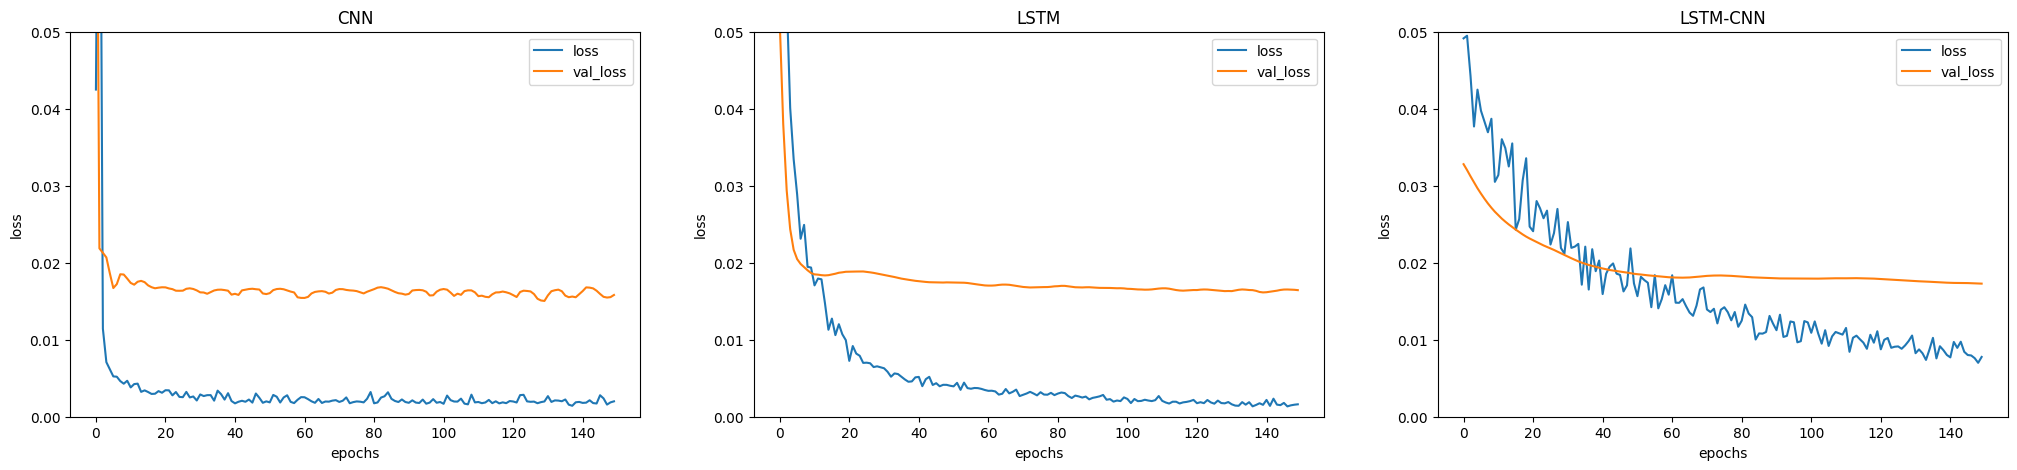

In [12]:
legend = list()

fig, axs = plt.subplots(1, 3, figsize=(25,5))

def plot_graphs(metric, val, ax, upper):
    ax.plot(val['history'].history[metric])
    ax.plot(val['history'].history[f'val_{metric}'])
    ax.set_title(key)
    ax.legend([metric, f"val_{metric}"])
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    ax.set_ylim([0, upper])
    
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    
    plot_graphs('loss', val, ax, 0.05)
print("Loss Curves")

MAE Curves


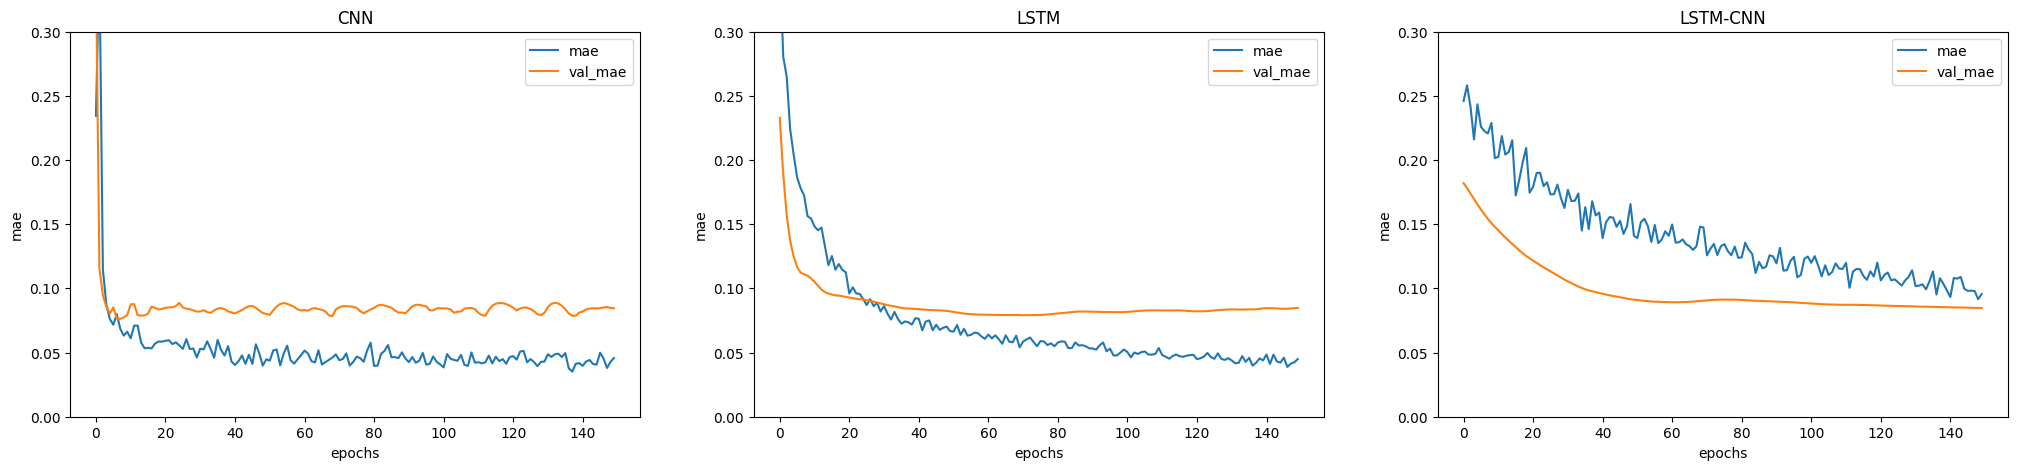

In [13]:
print("MAE Curves")
fig, axs = plt.subplots(1, 3, figsize=(25,5))
for (key, val), ax in zip(model_configs.items(), axs.flatten()):
    plot_graphs('mae', val, ax, 0.3)

# Evaluation of Test Results
It's surprising to see how well a CNN did. LSTM would be expected to perform well because of its ability to learn and remember longer trends in the data.

Putting the models' performance in perspective however the results show how with a limited lookback window, and simple features a lstm, and a cnn stacked with an lstm are a good starting choice for architecture.


In [14]:
names = list()
performance = list()

for key, value in model_configs.items():
    names.append(key)
    mae = value['model'].evaluate(value['test_ds'])
    performance.append(mae[1])
    
performance_df = pd.DataFrame(performance, index=names, columns=['mae'])
performance_df

1/1 [==============================] - 0s 66ms/step - loss: 0.0030 - mae: 0.0640


,mae
CNN,0.074863
LSTM,0.075830
LSTM-CNN,0.063964


# Visualizing Predictions

Plot the actual and predicted 24 hour intervals. Below is the first 14 days of predictions. Interesting to note how the LSTM appears to oscilate over a longer frequency compared with the other models. The CNN also seems to capture the intra day oscillations (within the 24 hour period). Looking at the CNN stacked LSTM we can see how these two characteristics of the model's learning combine.

1/1 [==============================] - 0s 34ms/step


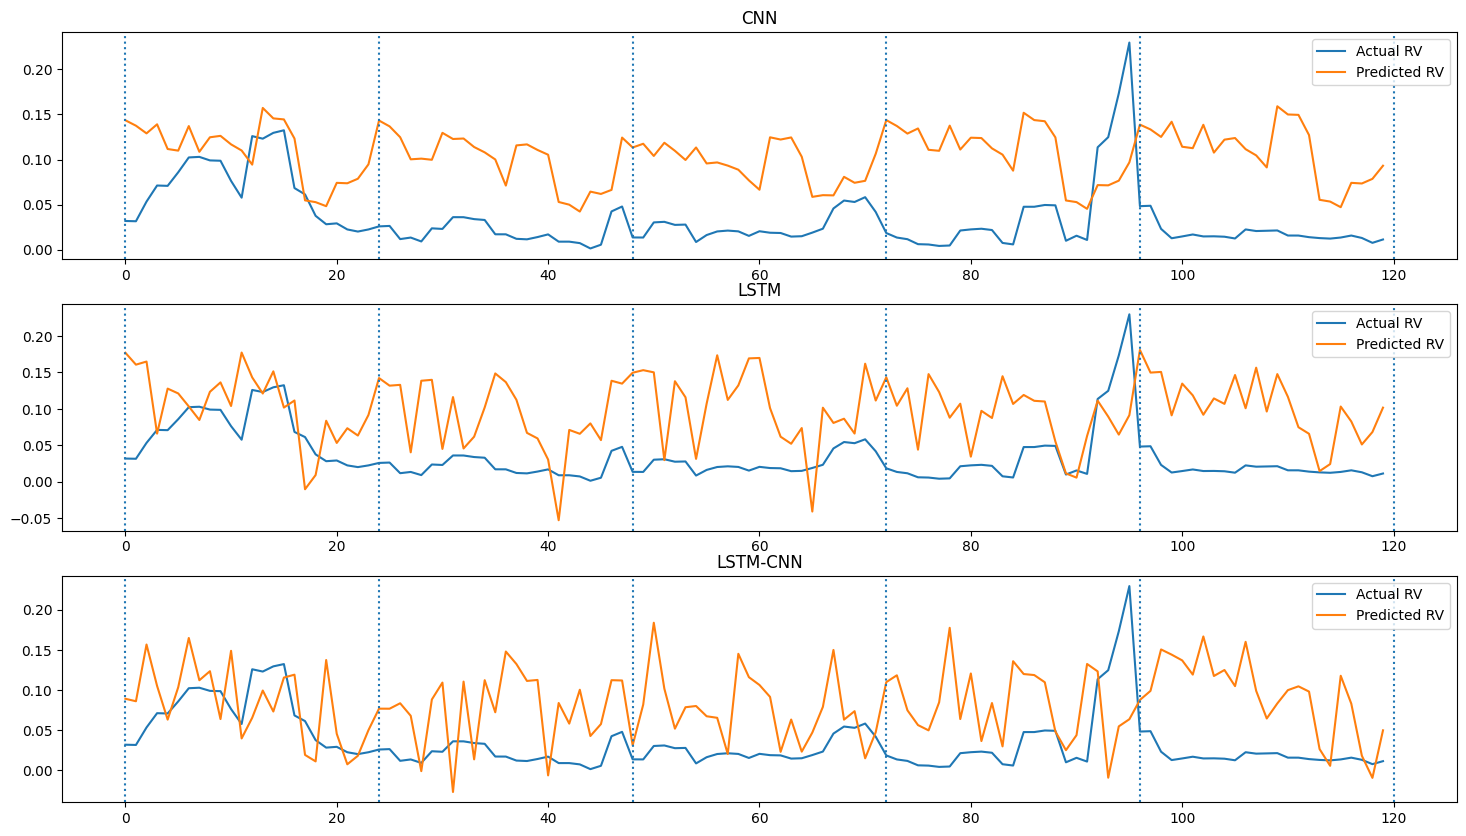

In [16]:
fig, axs = plt.subplots(3, 1, figsize=(18, 10))
days = 5

vline = np.linspace(0, days*24, days+1)

for (key, val), ax in zip(model_configs.items(), axs):

    test = val['test_ds']
    preds = val['model'].predict(test)

    xbatch, ybatch = iter(test).get_next()

    ax.plot(ybatch.numpy()[:days].reshape(-1))
    ax.plot(preds[:days].reshape(-1))
    ax.set_title(key)
    ax.vlines(vline, ymin=0, ymax=1, linestyle='dotted', transform = ax.get_xaxis_transform())
    ax.legend(["Actual RV", "Predicted RV"])